In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [62]:
data = pd.read_csv("Í±¥Í∞ïÏ°∞ÏÇ¨_2012~2023.csv")

In [3]:
data

mod_d          ID       ID_fam  year  region  town_t  apt_t  \
0      b'2022.03.08'         NaN  b'A1349783'  2012     1.0     1.0    1.0   
1      b'2022.03.08'         NaN  b'A1349783'  2012     1.0     1.0    1.0   
2      b'2022.03.08'         NaN  b'A1349783'  2012     1.0     1.0    1.0   
3      b'2022.03.08'         NaN  b'A1349779'  2012     1.0     1.0    1.0   
4      b'2022.03.08'         NaN  b'A1349779'  2012     1.0     1.0    1.0   
...              ...         ...          ...   ...     ...     ...    ...   
91023    2024.12.10.  YA84382303     YA843823  2023     1.0     1.0    2.0   
91024    2024.12.10.  YA84208301     YA842083  2023     1.0     1.0    2.0   
91025    2024.12.10.  YA84382304     YA843823  2023     1.0     1.0    2.0   
91026    2024.12.10.  YA84410601     YA844106  2023     1.0     1.0    2.0   
91027    2024.12.10.  YA84384301     YA843843  2023     1.0     1.0    2.0   

           psu  sex   age  age_month  incm  ho_incm  incm5  ho_incm5  edu  \
0      b'A134'  2.0  19.0        NaN   3.0      3.0    4.0       4.0  3.0   
1      b'A134'  2.0  44.0        NaN   3.0      3.0    4.0       4.0  4.0   
2      b'A134'  1.0  48.0        NaN   3.0      3.0    3.0       4.0  3.0   
3      b'A134'  1.0  45.0        NaN   3.0      4.0    4.0       4.0  3.0   
4      b'A134'  2.0  47.0        NaN   3.0      4.0    4.0       4.0  2.0   
...        ...  ...   ...        ...   ...      ...    ...       ...  ...   
91023     YA84  2.0   9.0        NaN   2.0      3.0    3.0       3.0  1.0   
91024     YA84  1.0  75.0        NaN   3.0      2.0    4.0       2.0  1.0   
91025     YA84  1.0   9.0        NaN   2.0      3.0    3.0       3.0  1.0   
91026     YA84  2.0  61.0        NaN   2.0      2.0    2.0       3.0  3.0   
91027     YA84  2.0  50.0        NaN   2.0      2.0    2.0       3.0  4.0   

       occp         wt_hs      wt_itvex         wt_oe        wt_ntr  \
0       7.0   6328.796718   7753.113108           NaN   8289.914519   
1       1.0   6328.796718   5125.933713           NaN   5040.418984   
2       5.0   6328.796718   9384.817359           NaN  13656.358598   
3       3.0   6328.796718  14077.226038           NaN           NaN   
4       3.0   6328.796718  12393.346024           NaN  19104.277429   
...     ...           ...           ...           ...           ...   
91023   NaN  11460.881778  12605.334818  12175.772093  12605.334818   
91024   7.0  11460.881778  11633.543550  11740.649472  11581.903830   
91025   NaN  11460.881778  15169.783423  12493.157722  17667.076039   
91026   6.0  11460.881778  12826.112033  11042.440313  12973.681626   
91027   7.0  11460.881778  11151.948250  18432.774553  11267.698823   

             wt_tot       wt_oent  kstrata  cfam  genertn  allownc  house  \
0      12868.977377           NaN    512.0   5.0      4.0     20.0    2.0   
1       7492.375534           NaN    512.0   5.0      4.0     20.0    2.0   
2      17544.992243           NaN    512.0   5.0      4.0     20.0    2.0   
3               NaN           NaN    512.0   3.0      4.0     20.0    2.0   
4      21590.625741           NaN    512.0   3.0      4.0     20.0    2.0   
...             ...           ...      ...   ...      ...      ...    ...   
91023  11767.917247  11783.992783    101.0   4.0      4.0     20.0    2.0   
91024  11479.203518  11934.223778    101.0   3.0      4.0     20.0    1.0   
91025  12238.551756  12170.107712    101.0   4.0      4.0     20.0    2.0   
91026  10450.494228  11116.588032    101.0   3.0      4.0     20.0    1.0   
91027  13039.787224  18903.364294    101.0   4.0      4.0     20.0    3.0   

       live_t  ainc_unit1  ainc_1        ainc  marri_1  marri_2  fam_rela  \
0         3.0         1.0  6200.0  516.666667      2.0     88.0       3.0   
1         3.0         1.0  6200.0  516.666667      1.0      1.0       2.0   
2         3.0         1.0  6200.0  516.666667      1.0      1.0       1.0   
3         3.0         1.0  5760.0  480.000000      1.0      1.0    

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # ÏòàÏãú: ÎßëÏùÄ Í≥†ÎîïÏúºÎ°ú ÏÑ§Ï†ï (Windows ÌôòÍ≤Ω Ïãú)
plt.rcParams['axes.unicode_minus'] = False

In [5]:
import pandas as pd

# ÎÇ®Í∏∞Í≥† Ïã∂ÏùÄ Ïª¨Îüº Î¶¨Ïä§Ìä∏
columns_to_keep = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu','HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
    'HE_obe', 'HE_HP', 'HE_DM_HbA1c',
    'DE1_dg', 'DI1_dg','DE1_pt', 'DI1_pt'
]

# ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ dfÏùº Îïå
data = data[columns_to_keep]

**Ïó∞ÎèÑÎ≥Ñ ÏßàÎ≥ëÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ ÌôïÏù∏**

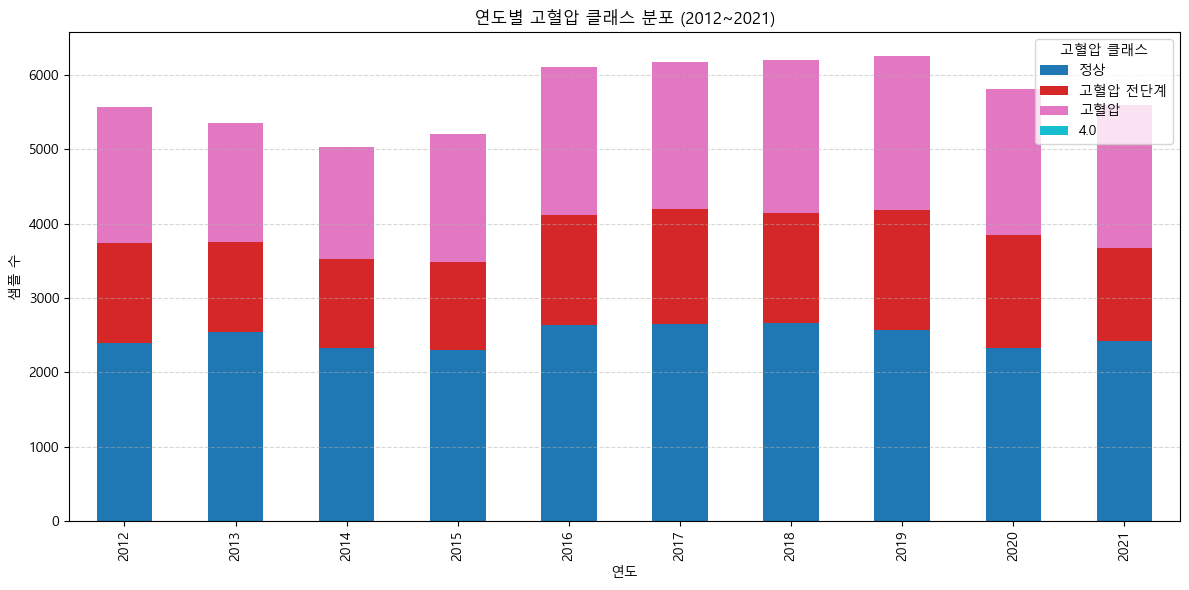

HE_HP    Ï†ïÏÉÅ  Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ   Í≥†ÌòàÏïï  4.0
year                           
2012   2394     1341  1830    0
2013   2543     1215  1594    0
2014   2325     1201  1505    0
2015   2304     1174  1726    0
2016   2641     1469  1995    0
2017   2646     1554  1978    0
2018   2659     1480  2061    0
2019   2571     1615  2075    0
2020   2329     1520  1960    0
2021   2416     1252  1924    0


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# HE_HP ÌÅ¥ÎûòÏä§ ÌïúÍ∏Ä ÎùºÎ≤® Îß§Ìïë
label_map = {
    1: "Ï†ïÏÉÅ",
    2: "Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ",
    3: "Í≥†ÌòàÏïï"
}

# Ïó∞ÎèÑÎ≥Ñ HE_HP Î∂ÑÌè¨ Í≥ÑÏÇ∞
year_class_counts = data.groupby("year")["HE_HP"].value_counts().unstack(fill_value=0)

# ÌÅ¥ÎûòÏä§ Ïª¨Îüº ÌïúÍ∏ÄÎ°ú Î≥ÄÍ≤Ω
year_class_counts.rename(columns=label_map, inplace=True)

# Ïó∞ÎèÑ ÌïÑÌÑ∞ÎßÅ (2012~2021ÎÖÑ)
year_class_counts = year_class_counts.loc[2012:2021]

# Ïä§ÌÉù Î∞îÏ∞®Ìä∏ ÏãúÍ∞ÅÌôî
year_class_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
plt.title("Ïó∞ÎèÑÎ≥Ñ Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ (2012~2021)")
plt.xlabel("Ïó∞ÎèÑ")
plt.ylabel("ÏÉòÌîå Ïàò")
plt.legend(title="Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ÏàòÏπò ÌôïÏù∏
print(year_class_counts)


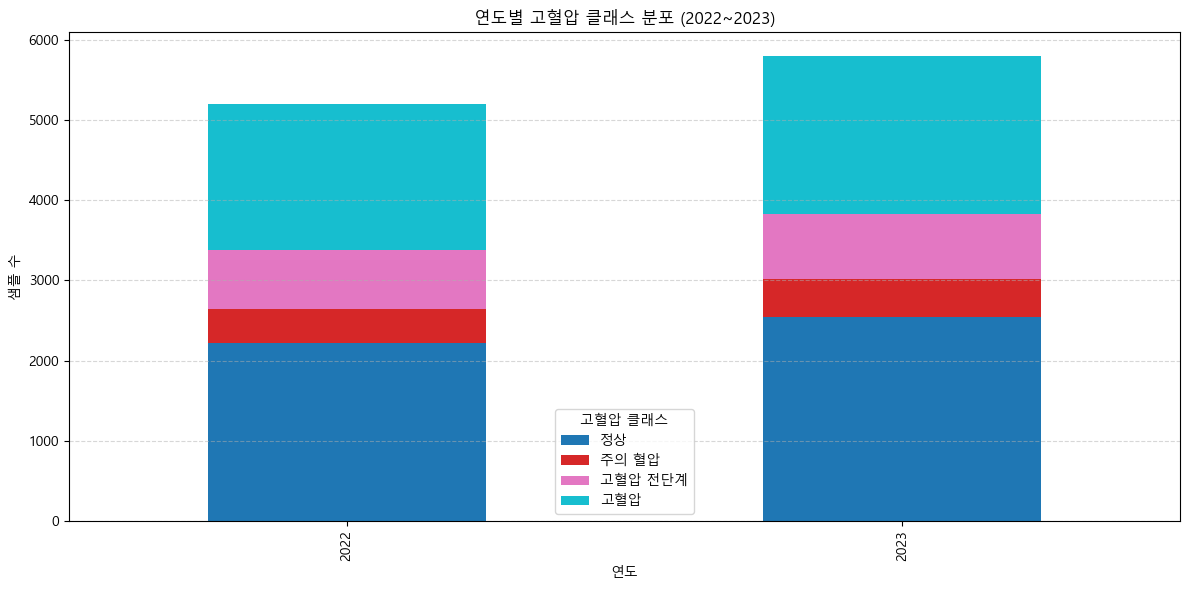

HE_HP    Ï†ïÏÉÅ  Ï£ºÏùò ÌòàÏïï  Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ   Í≥†ÌòàÏïï
year                             
2022   2223    418      737  1824
2023   2549    464      815  1979


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# HE_HP ÌÅ¥ÎûòÏä§ ÌïúÍ∏Ä ÎùºÎ≤® Îß§Ìïë
label_map = {
    1: "Ï†ïÏÉÅ",
    2: "Ï£ºÏùò ÌòàÏïï",
    3: "Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ",
    4: "Í≥†ÌòàÏïï"
}

# Ïó∞ÎèÑÎ≥Ñ HE_HP Î∂ÑÌè¨ Í≥ÑÏÇ∞
year_class_counts = data.groupby("year")["HE_HP"].value_counts().unstack(fill_value=0)

# ÌÅ¥ÎûòÏä§ Ïª¨Îüº ÌïúÍ∏ÄÎ°ú Î≥ÄÍ≤Ω
year_class_counts.rename(columns=label_map, inplace=True)

# Ïó∞ÎèÑ ÌïÑÌÑ∞ÎßÅ (2012~2021ÎÖÑ)
year_class_counts = year_class_counts.loc[2022:2023]

# Ïä§ÌÉù Î∞îÏ∞®Ìä∏ ÏãúÍ∞ÅÌôî
year_class_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
plt.title("Ïó∞ÎèÑÎ≥Ñ Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ (2022~2023)")
plt.xlabel("Ïó∞ÎèÑ")
plt.ylabel("ÏÉòÌîå Ïàò")
plt.legend(title="Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ÏàòÏπò ÌôïÏù∏
print(year_class_counts)


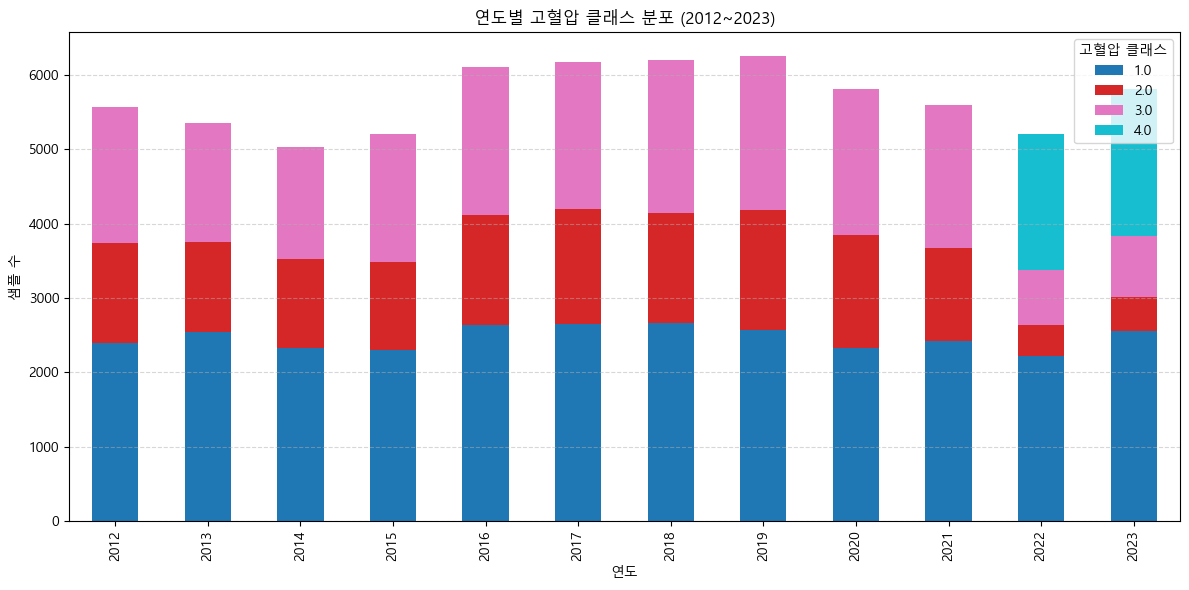

HE_HP   1.0   2.0   3.0   4.0
year                         
2012   2394  1341  1830     0
2013   2543  1215  1594     0
2014   2325  1201  1505     0
2015   2304  1174  1726     0
2016   2641  1469  1995     0
2017   2646  1554  1978     0
2018   2659  1480  2061     0
2019   2571  1615  2075     0
2020   2329  1520  1960     0
2021   2416  1252  1924     0
2022   2223   418   737  1824
2023   2549   464   815  1979


In [14]:
import pandas as pd
import matplotlib.pyplot as plt



# Ïó∞ÎèÑÎ≥Ñ HE_HP Î∂ÑÌè¨ Í≥ÑÏÇ∞
year_class_counts = data.groupby("year")["HE_HP"].value_counts().unstack(fill_value=0)


# Ïó∞ÎèÑ ÌïÑÌÑ∞ÎßÅ (2012~2021ÎÖÑ)
year_class_counts = year_class_counts.loc[2012:2023]

# Ïä§ÌÉù Î∞îÏ∞®Ìä∏ ÏãúÍ∞ÅÌôî
year_class_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
plt.title("Ïó∞ÎèÑÎ≥Ñ Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ (2012~2023)")
plt.xlabel("Ïó∞ÎèÑ")
plt.ylabel("ÏÉòÌîå Ïàò")
plt.legend(title="Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ÏàòÏπò ÌôïÏù∏
print(year_class_counts)


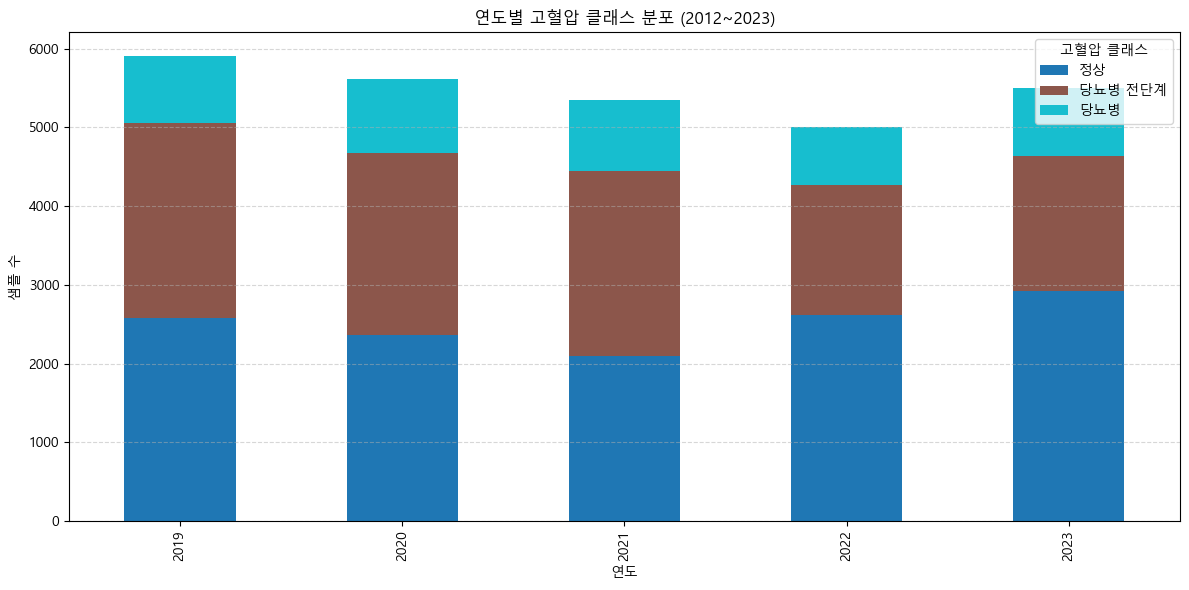

HE_DM_HbA1c    Ï†ïÏÉÅ  ÎãπÎá®Î≥ë Ï†ÑÎã®Í≥Ñ  ÎãπÎá®Î≥ë
year                           
2019         2583     2480  851
2020         2357     2319  936
2021         2101     2347  899
2022         2614     1655  738
2023         2925     1719  860


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# HE_HP ÌÅ¥ÎûòÏä§ ÌïúÍ∏Ä ÎùºÎ≤® Îß§Ìïë
label_map = {
    1: "Ï†ïÏÉÅ",
    2: "ÎãπÎá®Î≥ë Ï†ÑÎã®Í≥Ñ",
    3: "ÎãπÎá®Î≥ë"
}

# Ïó∞ÎèÑÎ≥Ñ HE_HP Î∂ÑÌè¨ Í≥ÑÏÇ∞
year_class_counts = data.groupby("year")["HE_DM_HbA1c"].value_counts().unstack(fill_value=0)

# ÌÅ¥ÎûòÏä§ Ïª¨Îüº ÌïúÍ∏ÄÎ°ú Î≥ÄÍ≤Ω
year_class_counts.rename(columns=label_map, inplace=True)

# Ïó∞ÎèÑ ÌïÑÌÑ∞ÎßÅ (2012~2021ÎÖÑ)
year_class_counts = year_class_counts.loc[2012:2023]

# Ïä§ÌÉù Î∞îÏ∞®Ìä∏ ÏãúÍ∞ÅÌôî
year_class_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
plt.title("Ïó∞ÎèÑÎ≥Ñ Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ (2012~2023)")
plt.xlabel("Ïó∞ÎèÑ")
plt.ylabel("ÏÉòÌîå Ïàò")
plt.legend(title="Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ÏàòÏπò ÌôïÏù∏
print(year_class_counts)


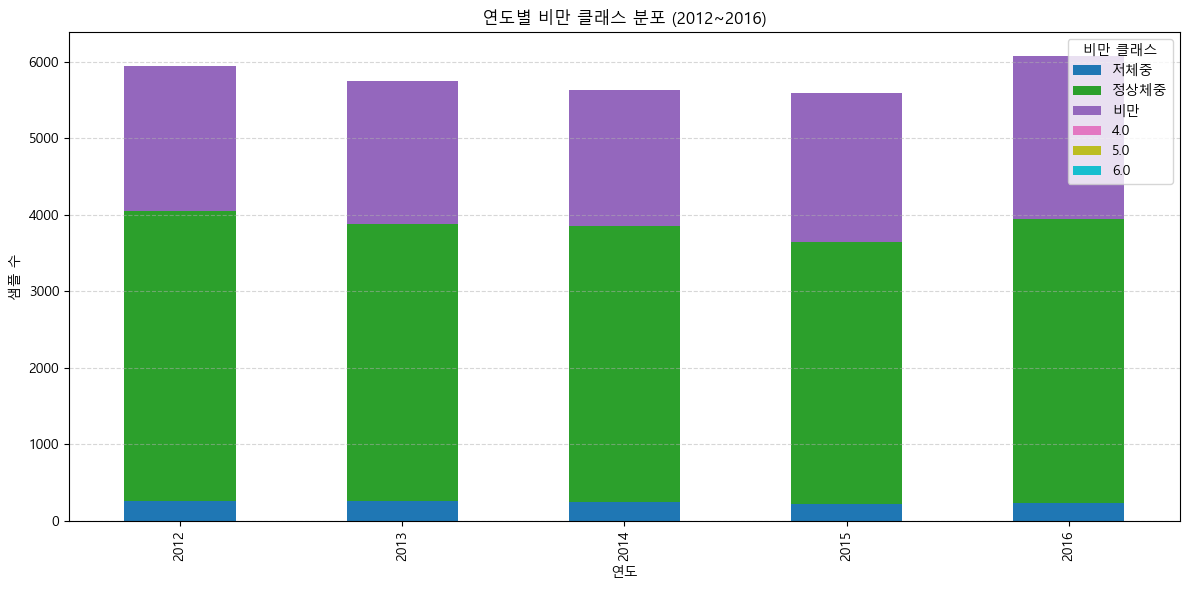

HE_obe  Ï†ÄÏ≤¥Ï§ë  Ï†ïÏÉÅÏ≤¥Ï§ë    ÎπÑÎßå  4.0  5.0  6.0
year                                  
2012    267  3778  1897    0    0    0
2013    257  3620  1871    0    0    0
2014    248  3609  1775    0    0    0
2015    221  3423  1948    0    0    0
2016    234  3709  2135    0    0    0


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# HE_HP ÌÅ¥ÎûòÏä§ ÌïúÍ∏Ä ÎùºÎ≤® Îß§Ìïë
label_map = {
    1: "Ï†ÄÏ≤¥Ï§ë",
    2: "Ï†ïÏÉÅÏ≤¥Ï§ë",
    3: "ÎπÑÎßå"
}

# Ïó∞ÎèÑÎ≥Ñ HE_HP Î∂ÑÌè¨ Í≥ÑÏÇ∞
year_class_counts = data.groupby("year")["HE_obe"].value_counts().unstack(fill_value=0)

# ÌÅ¥ÎûòÏä§ Ïª¨Îüº ÌïúÍ∏ÄÎ°ú Î≥ÄÍ≤Ω
year_class_counts.rename(columns=label_map, inplace=True)

# Ïó∞ÎèÑ ÌïÑÌÑ∞ÎßÅ (2012~2021ÎÖÑ)
year_class_counts = year_class_counts.loc[2012:2016]

# Ïä§ÌÉù Î∞îÏ∞®Ìä∏ ÏãúÍ∞ÅÌôî
year_class_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
plt.title("Ïó∞ÎèÑÎ≥Ñ ÎπÑÎßå ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ (2012~2016)")
plt.xlabel("Ïó∞ÎèÑ")
plt.ylabel("ÏÉòÌîå Ïàò")
plt.legend(title="ÎπÑÎßå ÌÅ¥ÎûòÏä§")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ÏàòÏπò ÌôïÏù∏
print(year_class_counts)


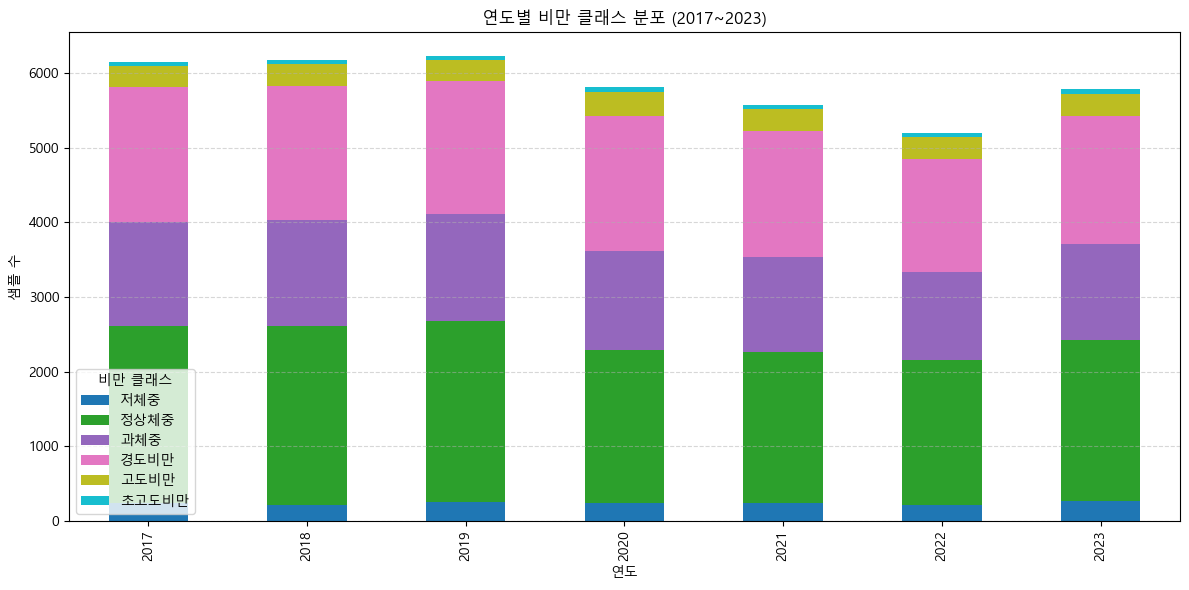

HE_obe  Ï†ÄÏ≤¥Ï§ë  Ï†ïÏÉÅÏ≤¥Ï§ë   Í≥ºÏ≤¥Ï§ë  Í≤ΩÎèÑÎπÑÎßå  Í≥†ÎèÑÎπÑÎßå  Ï¥àÍ≥†ÎèÑÎπÑÎßå
year                                      
2017    244  2368  1389  1817   281     51
2018    215  2400  1413  1801   296     45
2019    249  2430  1432  1778   288     55
2020    240  2044  1330  1811   326     64
2021    244  2015  1281  1684   297     53
2022    207  1950  1175  1521   285     59
2023    264  2156  1293  1707   304     56


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# HE_HP ÌÅ¥ÎûòÏä§ ÌïúÍ∏Ä ÎùºÎ≤® Îß§Ìïë
label_map = {
    1: "Ï†ÄÏ≤¥Ï§ë",
    2: "Ï†ïÏÉÅÏ≤¥Ï§ë",
    3: "Í≥ºÏ≤¥Ï§ë",
    4: "Í≤ΩÎèÑÎπÑÎßå",
    5: "Í≥†ÎèÑÎπÑÎßå",
    6: "Ï¥àÍ≥†ÎèÑÎπÑÎßå"
}

# Ïó∞ÎèÑÎ≥Ñ HE_HP Î∂ÑÌè¨ Í≥ÑÏÇ∞
year_class_counts = data.groupby("year")["HE_obe"].value_counts().unstack(fill_value=0)

# ÌÅ¥ÎûòÏä§ Ïª¨Îüº ÌïúÍ∏ÄÎ°ú Î≥ÄÍ≤Ω
year_class_counts.rename(columns=label_map, inplace=True)

# Ïó∞ÎèÑ ÌïÑÌÑ∞ÎßÅ (2012~2021ÎÖÑ)
year_class_counts = year_class_counts.loc[2017:2023]

# Ïä§ÌÉù Î∞îÏ∞®Ìä∏ ÏãúÍ∞ÅÌôî
year_class_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
plt.title("Ïó∞ÎèÑÎ≥Ñ ÎπÑÎßå ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ (2017~2023)")
plt.xlabel("Ïó∞ÎèÑ")
plt.ylabel("ÏÉòÌîå Ïàò")
plt.legend(title="ÎπÑÎßå ÌÅ¥ÎûòÏä§")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ÏàòÏπò ÌôïÏù∏
print(year_class_counts)


**Ï†ÑÏ≤òÎ¶¨ Ï†Ñ ÌõÑ ÎπÑÍµê**

In [69]:
data=pd.read_csv("Í±¥Í∞ïÏ°∞ÏÇ¨_2012~2023.csv")

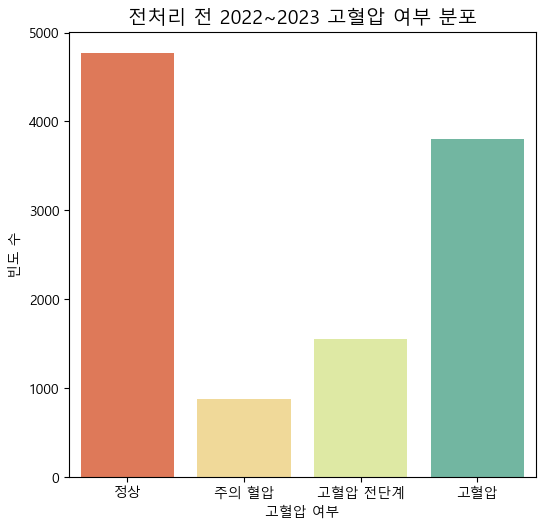

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§ ÌïúÍ∏Ä ÎùºÎ≤® Îß§Ìïë
label_map = {
    1: "Ï†ïÏÉÅ",
    2: "Ï£ºÏùò ÌòàÏïï",
    3: "Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ",
    4: "Í≥†ÌòàÏïï"
}

# ‚úÖ 2022~2023ÎÖÑ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
data_22_23 = data[data["year"].isin([2022, 2023])].copy()

# ÌïúÍ∏Ä ÎùºÎ≤® Ïó¥ Ï∂îÍ∞Ä (ÏõêÎ≥∏ÏùÄ Ïú†ÏßÄ)
data_22_23["HE_HP_label"] = data_22_23["HE_HP"].map(label_map)

# ÏãúÍ∞ÅÌôîÌï† Î≥ÄÏàò Î¶¨Ïä§Ìä∏
targets = ['HE_HP_label']
column_labels = {
    'HE_HP_label': 'Í≥†ÌòàÏïï Ïó¨Î∂Ä'
}

# ÏÑúÎ∏åÌîåÎ°Ø ÏÑ§Ï†ï (2Ìñâ 4Ïó¥: 8Í∞ú Ïπ∏ Ï§ë 1Í∞ú ÏÇ¨Ïö©)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# countplot Í∑∏Î¶¨Í∏∞
for i, var in enumerate(targets):
    sns.countplot(
        x=var,
        data=data_22_23,
        palette="Spectral",
        order=["Ï†ïÏÉÅ", "Ï£ºÏùò ÌòàÏïï", "Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ", "Í≥†ÌòàÏïï"],  # ÏàúÏÑú Í≥†Ï†ï
        ax=axes[i]
    )
    axes[i].set_title(f"Ï†ÑÏ≤òÎ¶¨ Ï†Ñ 2022~2023 {column_labels[var]} Î∂ÑÌè¨", fontsize=14)
    axes[i].set_xlabel(column_labels[var])
    axes[i].set_ylabel('ÎπàÎèÑ Ïàò')

# ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäî subplot Ïà®Í∏∞Í∏∞
for j in range(len(targets), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [71]:
# ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ ÌôïÏù∏
print(data_22_23["HE_HP"].value_counts().sort_index())

HE_HP
1.0    4772
2.0     882
3.0    1552
4.0    3803
Name: count, dtype: int64


**Ï†ÑÏ≤òÎ¶¨ : Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨**

In [89]:
data=pd.read_csv("ÎãπÎá®(2~3 ÌÅ¥ÎûòÏä§)Ìï©Ïπ®.csv")

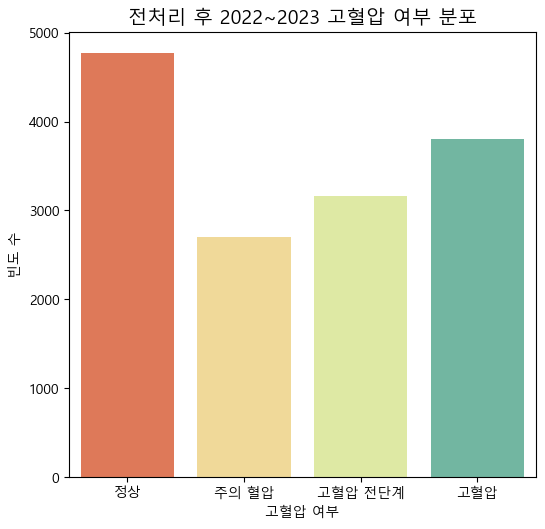

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§ ÌïúÍ∏Ä ÎùºÎ≤® Îß§Ìïë
label_map = {
    1: "Ï†ïÏÉÅ",
    2: "Ï£ºÏùò ÌòàÏïï",
    3: "Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ",
    4: "Í≥†ÌòàÏïï"
}

# ÌïúÍ∏Ä ÎùºÎ≤® Ïó¥ Ï∂îÍ∞Ä (ÏõêÎ≥∏ÏùÄ Ïú†ÏßÄ)
data["HE_HP_label"] = data["HE_HP"].map(label_map)

# ÏãúÍ∞ÅÌôîÌï† Î≥ÄÏàò Î¶¨Ïä§Ìä∏
targets = ['HE_HP_label']
column_labels = {
    'HE_HP_label': 'Í≥†ÌòàÏïï Ïó¨Î∂Ä'
}

# ÏõêÌïòÎäî ÎßâÎåÄ ÏàúÏÑú ÏßÄÏ†ï
label_order = ["Ï†ïÏÉÅ", "Ï£ºÏùò ÌòàÏïï", "Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ", "Í≥†ÌòàÏïï"]

# ÏÑúÎ∏åÌîåÎ°Ø ÏÑ§Ï†ï (2Ìñâ 4Ïó¥: 8Í∞ú Ïπ∏ Ï§ë 1Í∞ú ÏÇ¨Ïö©)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# countplot Í∑∏Î¶¨Í∏∞
for i, var in enumerate(targets):
    sns.countplot(
        x=var,
        data=data,
        palette="Spectral",
        order=label_order,  # ÏàúÏÑú ÏßÄÏ†ï
        ax=axes[i]
    )
    axes[i].set_title(f"Ï†ÑÏ≤òÎ¶¨ ÌõÑ 2022~2023 {column_labels[var]} Î∂ÑÌè¨", fontsize=14)
    axes[i].set_xlabel(column_labels[var])
    axes[i].set_ylabel('ÎπàÎèÑ Ïàò')

# ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäî subplot Ïà®Í∏∞Í∏∞
for j in range(len(targets), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [75]:
# ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ ÌôïÏù∏
print(data["HE_HP"].value_counts().sort_index())

HE_HP
1.0    4772
2.0    2704
3.0    3160
4.0    3803
Name: count, dtype: int64


In [76]:
# HE_HP Ïª¨ÎüºÏùò Í≤∞Ï∏°Ïπò Í∞úÏàò Í≥ÑÏÇ∞
missing_count = data['HE_HP'].isnull().sum()

# Ï†ÑÏ≤¥ HE_HP Ïª¨ÎüºÏùò Îç∞Ïù¥ÌÑ∞ Í∞úÏàò Í≥ÑÏÇ∞
total_count = len(data['HE_HP'])

# Í≤∞Ï∏°Ïπò ÎπÑÏú® Í≥ÑÏÇ∞
missing_percentage = (missing_count / total_count) * 100

print(f"Í≥†ÌòàÏïï Ïª¨ÎüºÏùò Ï¥ù Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {total_count}Í∞ú")
print(f"Í≥†ÌòàÏïï Ïª¨ÎüºÏùò Í≤∞Ï∏°Ïπò(NaN) Í∞úÏàò: {missing_count}Í∞ú")
print(f"Í≥†ÌòàÏïï Ïª¨ÎüºÏùò Í≤∞Ï∏°Ïπò ÎπÑÏú®: {missing_percentage:.2f}%")

Í≥†ÌòàÏïï Ïª¨ÎüºÏùò Ï¥ù Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 16624Í∞ú
Í≥†ÌòàÏïï Ïª¨ÎüºÏùò Í≤∞Ï∏°Ïπò(NaN) Í∞úÏàò: 2185Í∞ú
Í≥†ÌòàÏïï Ïª¨ÎüºÏùò Í≤∞Ï∏°Ïπò ÎπÑÏú®: 13.14%


In [77]:
import pandas as pd
import numpy as np

# --- Ï†ÑÏ≤¥ HE_HP Ïª¨ÎüºÏùò Í≤∞Ï∏°Ïπò ÎπÑÏú® Í≥ÑÏÇ∞ ---
missing_count_all = data['HE_HP'].isnull().sum()
total_count_all = len(data['HE_HP'])
missing_percentage_all = (missing_count_all / total_count_all) * 100

print(f"**Ï†ÑÏ≤¥ Í≥†ÌòàÏïï Ïª¨Îüº (`HE_HP`) Í≤∞Ï∏°Ïπò ÌòÑÌô©:**")
print(f"  Ï¥ù Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {total_count_all}Í∞ú")
print(f"  Í≤∞Ï∏°Ïπò(NaN) Í∞úÏàò: {missing_count_all}Í∞ú")
print(f"  Í≤∞Ï∏°Ïπò ÎπÑÏú®: {missing_percentage_all:.2f}%")
print("-" * 30)

# --- DI1_pt=8Ïù∏ ÌñâÎì§ Ï§ëÏóêÏÑú HE_HP Ïª¨ÎüºÏùò Í≤∞Ï∏°Ïπò ÎπÑÏú® Í≥ÑÏÇ∞ ---
# DI1_pt=8Ïù∏ ÌñâÎì§Îßå ÌïÑÌÑ∞ÎßÅ
data_di1_pt_8 = data[data['DI1_pt'] == 8]

# ÌïÑÌÑ∞ÎßÅÎêú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú HE_HP Ïª¨ÎüºÏùò Í≤∞Ï∏°Ïπò Í∞úÏàò Í≥ÑÏÇ∞
missing_count_di1_pt_8 = data_di1_pt_8['HE_HP'].isnull().sum()

# ÌïÑÌÑ∞ÎßÅÎêú Îç∞Ïù¥ÌÑ∞Ïùò Ï¥ù HE_HP Ïª¨Îüº Îç∞Ïù¥ÌÑ∞ Í∞úÏàò Í≥ÑÏÇ∞
total_count_di1_pt_8 = len(data_di1_pt_8['HE_HP'])

# Í≤∞Ï∏°Ïπò ÎπÑÏú® Í≥ÑÏÇ∞ (DI1_pt=8 Ï°∞Í±¥ ÌïòÏóêÏÑú)
if total_count_di1_pt_8 > 0: # 0ÏúºÎ°ú ÎÇòÎàÑÎäî Ïò§Î•ò Î∞©ÏßÄ
    missing_percentage_di1_pt_8 = (missing_count_di1_pt_8 / total_count_di1_pt_8) * 100
else:
    missing_percentage_di1_pt_8 = 0.0 # Ìï¥Îãπ Ï°∞Í±¥Ïùò Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏúºÎ©¥ 0%

print(f"**Ï°∞Í±¥: 'Í≥†ÌòàÏïï ÏπòÎ£åÏó¨Î∂Ä ÏóÜÏùå(ÏùòÏÇ¨ÏóêÍ≤å Í≥†ÌòàÏïï ÏßÑÎã® Î∞õÏßÄ ÏïäÏùå) ÌñâÎì§ Ï§ëÏóêÏÑú Í≥†ÌòàÏïï Ïª¨Îüº Í≤∞Ï∏°Ïπò ÌòÑÌô©:**")
print(f"  Ï¥ù Îç∞Ïù¥ÌÑ∞ Í∞úÏàò : {total_count_di1_pt_8}Í∞ú")
print(f"  Í≤∞Ï∏°Ïπò(NaN) Í∞úÏàò: {missing_count_di1_pt_8}Í∞ú")
print(f"  Í≤∞Ï∏°Ïπò ÎπÑÏú®: {missing_percentage_di1_pt_8:.2f}%")
print("-" * 30)

**Ï†ÑÏ≤¥ Í≥†ÌòàÏïï Ïª¨Îüº (`HE_HP`) Í≤∞Ï∏°Ïπò ÌòÑÌô©:**
  Ï¥ù Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 16624Í∞ú
  Í≤∞Ï∏°Ïπò(NaN) Í∞úÏàò: 2185Í∞ú
  Í≤∞Ï∏°Ïπò ÎπÑÏú®: 13.14%
------------------------------
**Ï°∞Í±¥: 'Í≥†ÌòàÏïï ÏπòÎ£åÏó¨Î∂Ä ÏóÜÏùå(ÏùòÏÇ¨ÏóêÍ≤å Í≥†ÌòàÏïï ÏßÑÎã® Î∞õÏßÄ ÏïäÏùå) ÌñâÎì§ Ï§ëÏóêÏÑú Í≥†ÌòàÏïï Ïª¨Îüº Í≤∞Ï∏°Ïπò ÌòÑÌô©:**
  Ï¥ù Îç∞Ïù¥ÌÑ∞ Í∞úÏàò : 13408Í∞ú
  Í≤∞Ï∏°Ïπò(NaN) Í∞úÏàò: 2138Í∞ú
  Í≤∞Ï∏°Ïπò ÎπÑÏú®: 15.95%
------------------------------


In [120]:
data=pd.read_csv("ÎãπÎá®(2~3 ÌÅ¥ÎûòÏä§)Ìï©Ïπ®.csv")

ÌïúÍ∏Ä Ìè∞Ìä∏ 'Malgun Gothic' ÏÑ§Ï†ï ÏôÑÎ£å.


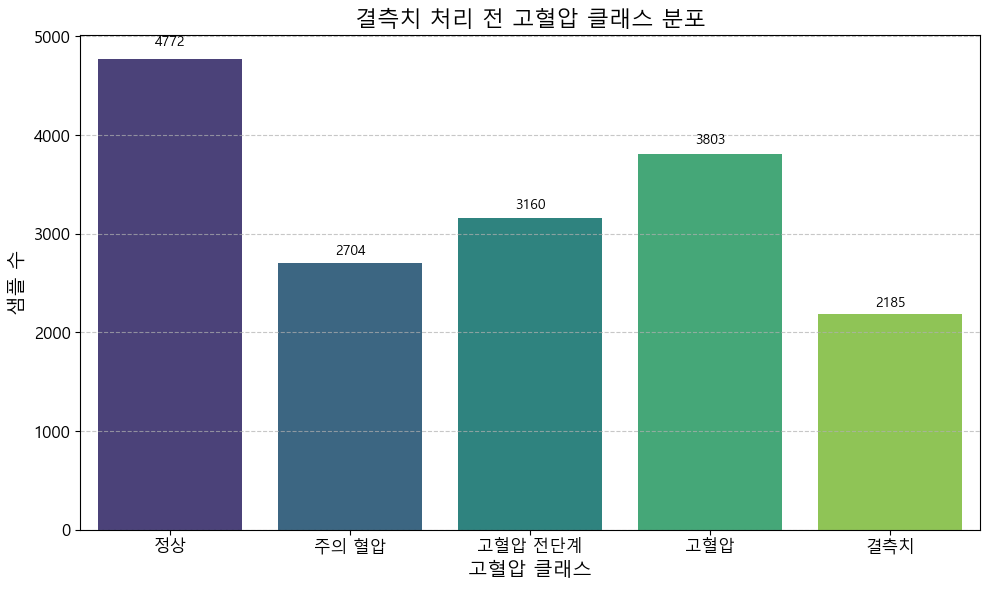


**Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï†Ñ Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ (ÏàòÏπò):**
HE_HP
Ï†ïÏÉÅ         4772
Í≥†ÌòàÏïï        3803
Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ    3160
Ï£ºÏùò ÌòàÏïï      2704
Í≤∞Ï∏°Ïπò        2185
Name: count, dtype: int64


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm # Ìè∞Ìä∏ ÏÑ§Ï†ïÏö©

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows ÏòàÏãú, Îã§Î•∏ OSÏóêÏÑúÎäî Í≤ΩÎ°úÎ•º ÎßûÏ∂∞Ï£ºÏÑ∏Ïöî)
# 'Malgun Gothic'Ïù¥ ÏóÜÏúºÎ©¥ ÏãúÏä§ÌÖúÏóê ÏÑ§ÏπòÎêú Îã§Î•∏ ÌïúÍ∏Ä Ìè∞Ìä∏Î™ÖÏúºÎ°ú Î≥ÄÍ≤ΩÌï¥Ï£ºÏÑ∏Ïöî (Ïòà: 'AppleGothic', 'NanumGothic').
try:
    plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
    plt.rcParams['axes.unicode_minus'] = False # ÎßàÏù¥ÎÑàÏä§ Ìè∞Ìä∏ Íπ®Ïßê Î∞©ÏßÄ
    print("ÌïúÍ∏Ä Ìè∞Ìä∏ 'Malgun Gothic' ÏÑ§Ï†ï ÏôÑÎ£å.")
except:
    print("ÌïúÍ∏Ä Ìè∞Ìä∏ 'Malgun Gothic'ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Í∏∞Î≥∏ Ìè∞Ìä∏Î°ú Ï∂úÎ†•Îê©ÎãàÎã§.")
    print("ÏÑ§ÏπòÎêú Ìè∞Ìä∏ ÌôïÏù∏: import matplotlib.font_manager as fm; [f.name for f in fm.fontManager.ttflist]")
    print("ÎòêÎäî Îã§Î•∏ Ìè∞Ìä∏Î™ÖÏúºÎ°ú Î≥ÄÍ≤ΩÌï¥Ï£ºÏÑ∏Ïöî (Ïòà: 'AppleGothic', 'NanumGothic').")


# Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§ ÌïúÍ∏Ä ÎùºÎ≤® Îß§Ìïë
label_map = {
    1: "Ï†ïÏÉÅ",
    2: "Ï£ºÏùò ÌòàÏïï",
    3: "Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ",
    4: "Í≥†ÌòàÏïï"
}

# 'HE_HP' Ïª¨ÎüºÏùò Î≥µÏÇ¨Î≥∏ÏùÑ ÎßåÎì§Ïñ¥ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï†Ñ ÏÉÅÌÉúÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
# Ïù¥ Î≥µÏÇ¨Î≥∏Ïóê ÌïúÍ∏Ä ÎùºÎ≤®ÏùÑ Îß§ÌïëÌïòÍ≥†, Í≤∞Ï∏°ÏπòÎèÑ Í∑∏ÎåÄÎ°ú Ìè¨Ìï®ÌïòÏó¨ ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
plot_data_before_imputation = data['HE_HP'].copy()

# Í≤∞Ï∏°Ïπò(NaN) Í∞íÏùÑ ÏãúÍ∞ÅÌôîÏóê Ìè¨Ìï®ÏãúÌÇ§Í∏∞ ÏúÑÌï¥ 'Í≤∞Ï∏°Ïπò' ÎùºÎ≤®Î°ú ÏûÑÏãú Îß§Ìïë
# value_counts()Îäî Í∏∞Î≥∏Ï†ÅÏúºÎ°ú NaNÏùÑ Ï†úÏô∏ÌïòÎØÄÎ°ú, Î™ÖÏãúÏ†ÅÏúºÎ°ú Ìè¨Ìï®ÌïòÍ±∞ÎÇò
# Î≤îÏ£ºÌòïÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ NaNÏùÑ ÌïòÎÇòÏùò Î≤îÏ£ºÎ°ú Ï∑®Í∏âÌïòÍ≤å Ìï† Ïàò ÏûàÏäµÎãàÎã§.
# Ïó¨Í∏∞ÏÑúÎäî plot_data_before_imputationÏóê ÏßÅÏ†ë NaNÏùÑ 'Í≤∞Ï∏°Ïπò'Î°ú Îß§ÌïëÌïòÏó¨ ÏãúÍ∞ÅÌôîÏóê ÎÇòÌÉÄÎÇòÍ≤å Ìï©ÎãàÎã§.
plot_data_before_imputation = plot_data_before_imputation.map(label_map)
plot_data_before_imputation = plot_data_before_imputation.fillna("Í≤∞Ï∏°Ïπò")

# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ: Í∞Å ÌÅ¥ÎûòÏä§Ïùò ÎπàÎèÑÏàò Í≥ÑÏÇ∞
class_counts = plot_data_before_imputation.value_counts(dropna=False) # dropna=FalseÎ°ú NaNÎèÑ Ìè¨Ìï®

# Î∞î Ï∞®Ìä∏Ïùò ÏàúÏÑúÎ•º Ï†ïÏùòÌï©ÎãàÎã§. (Ï†ïÏÉÅ, Ï£ºÏùò, Ï†ÑÎã®Í≥Ñ, Í≥†ÌòàÏïï, Í≤∞Ï∏°Ïπò)
# Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Ïóê Îî∞Îùº Ïù¥ ÏàúÏÑú Î¶¨Ïä§Ìä∏Î•º Ï°∞Ï†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.
order_list = ["Ï†ïÏÉÅ", "Ï£ºÏùò ÌòàÏïï", "Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ", "Í≥†ÌòàÏïï", "Í≤∞Ï∏°Ïπò"]
# Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî ÌÅ¥ÎûòÏä§Îßå ÏàúÏÑú Î¶¨Ïä§Ìä∏Ïóê Ìè¨Ìï®
order_list = [label for label in order_list if label in class_counts.index]


# ÏãúÍ∞ÅÌôî: Ïπ¥Ïö¥Ìä∏ ÌîåÎ°Ø
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis", order=order_list)

plt.title("Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï†Ñ Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨", fontsize=16)
plt.xlabel("Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§", fontsize=14)
plt.ylabel("ÏÉòÌîå Ïàò", fontsize=14)
plt.xticks(rotation=0, fontsize=12) # xÏ∂ï ÎùºÎ≤® ÏàòÌèâ Ïú†ÏßÄ
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Í∞Å Î∞î ÏúÑÏóê ÏÉòÌîå Ïàò ÌëúÏãú
for index, value in enumerate(class_counts[order_list]): # ÏàúÏÑúÏóê ÎßûÏ∂∞ÏÑú Í∞í Í∞ÄÏ†∏Ïò§Í∏∞
    plt.text(index, value + (value * 0.02), str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

print("\n**Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï†Ñ Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ (ÏàòÏπò):**")
print(class_counts)

In [112]:
import pandas as pd
import numpy as np


# --- HE_HP Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Í∞úÏÑ† (ÏàòÏ†ïÎêú ÏΩîÎìú) ---

# 1. 9, 99, 999, 888 Îì±ÏùÑ NaNÏúºÎ°ú Ï≤òÎ¶¨
data['HE_HP'] = data['HE_HP'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)


# # Ï°∞Í±¥ 1-1: DI1_pt 8 (ÏùòÏÇ¨ ÏßÑÎã® ÏóÜÏùå) & HE_HP NaN & ÏàòÏ∂ïÍ∏∞,Ïù¥ÏôÑÍ∏∞ ÌòàÏïï Ï†ïÏÉÅ
condition_hp_normal = (
    data['DI1_pt'] == 8 # Ïù¥ Î∂ÄÎ∂ÑÏùÑ 'DE1_dg'Î°ú ÏÇ¨Ïö©ÌïòÎ†§Î©¥ data['DE1_dg'] == 0 ÏúºÎ°ú Î≥ÄÍ≤Ω
) & (
    data['HE_HP'].isnull()
) & (
    data['HE_sbp1'] < 120
) & (
    data['HE_dbp1'] < 80
) 

# !!! Ï§ëÏöî: Ïó¨Í∏∞ Î≥ÄÏàòÎ™ÖÏùÑ Ïò¨Î∞îÎ•∏ Í≤ÉÏúºÎ°ú ÏàòÏ†ï !!!
data.loc[condition_hp_normal, 'HE_HP'] = 1 # 1: ÌòàÏïï Ï†ïÏÉÅ
print(f"HE_HP Í≤∞Ï∏°Ïπò Ï§ë 'DI1_pt=8 & ÌòàÏïï/ÏΩúÎ†àÏä§ÌÖåÎ°§/BMI/ÌòàÎãπ Ï†ïÏÉÅ Ï°∞Í±¥ ÎßåÏ°±'ÌïòÎäî Í≤ΩÏö∞ 1Î°ú Ï±ÑÏõÄ. ({condition_hp_normal.sum()}Í∞ú)")


# Ï°∞Í±¥ 1-2: DI1_pt 8 (ÏùòÏÇ¨ ÏßÑÎã® ÏóÜÏùå) & HE_HP NaN & ÏàòÏ∂ïÍ∏∞,Ïù¥ÏôÑÍ∏∞ ÌòàÏïï 'Ï£ºÏùò ÌòàÏïï' Î≤îÏúÑ
condition_hp_pre_attention = (
    data['DI1_pt'] == 8
) & (
    data['HE_HP'].isnull()
) & (
    (data['HE_sbp1'] >= 120) & (data['HE_sbp1'] < 130) & (data['HE_dbp1'] < 80)
)
data.loc[condition_hp_pre_attention, 'HE_HP'] = 2 # 2: Ï£ºÏùò ÌòàÏïï
print(f"HE_HP Í≤∞Ï∏°Ïπò Ï§ë 'DI1_pt=8 & 120<=ÏàòÏ∂ïÍ∏∞<130 & Ïù¥ÏôÑÍ∏∞<80' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 2Î°ú Ï±ÑÏõÄ. ({condition_hp_pre_attention.sum()}Í∞ú)")


# Ï°∞Í±¥ 1-3: DI1_pt 8 (ÏùòÏÇ¨ ÏßÑÎã® ÏóÜÏùå) & HE_HP NaN & ÏàòÏ∂ïÍ∏∞,Ïù¥ÏôÑÍ∏∞ ÌòàÏïï 'Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ' Î≤îÏúÑ
condition_hp_pre_hypertension = (
    data['DI1_pt'] == 8
) & (
    data['HE_HP'].isnull()
) & (
    (data['HE_sbp1'] >= 130) & (data['HE_sbp1'] < 140) & (data['HE_dbp1'] < 90)
)
data.loc[condition_hp_pre_hypertension, 'HE_HP'] = 3 # 3: Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ
print(f"HE_HP Í≤∞Ï∏°Ïπò Ï§ë 'DI1_pt=8 & 130<=ÏàòÏ∂ïÍ∏∞<140 & Ïù¥ÏôÑÍ∏∞<90' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 3Î°ú Ï±ÑÏõÄ. ({condition_hp_pre_hypertension.sum()}Í∞ú)")


# Ï°∞Í±¥ 1-4: DI1_pt 8 (ÏùòÏÇ¨ ÏßÑÎã® ÏóÜÏùå) & HE_HP NaN & ÏàòÏ∂ïÍ∏∞,Ïù¥ÏôÑÍ∏∞ ÌòàÏïï 'Í≥†ÌòàÏïï' Î≤îÏúÑ
condition_hp_hypertension = (
    data['DI1_pt'] == 8
) & (
    data['HE_HP'].isnull()
) & (
    (data['HE_sbp1'] >= 140) | (data['HE_dbp1'] >= 90)
)
# !!! Ï§ëÏöî: Ïó¨Í∏∞ Î≥ÄÏàòÎ™ÖÏùÑ Ïò¨Î∞îÎ•∏ Í≤ÉÏúºÎ°ú ÏàòÏ†ï !!!
data.loc[condition_hp_hypertension, 'HE_HP'] = 4 # 4: Í≥†ÌòàÏïï
print(f"HE_HP Í≤∞Ï∏°Ïπò Ï§ë 'DI1_pt=8 & (ÏàòÏ∂ïÍ∏∞>=140 ÎòêÎäî Ïù¥ÏôÑÍ∏∞>=90)' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 4Î°ú Ï±ÑÏõÄ. ({condition_hp_hypertension.sum()}Í∞ú)")


# 3. ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÌïòÍ±∞ÎÇò Îã§Î•∏ Î∞©ÏãùÏúºÎ°ú Ï≤òÎ¶¨
#    ÏúÑÏóêÏÑú Ï†ïÏùòÎêòÏßÄ ÏïäÏùÄ ÏºÄÏù¥Ïä§ (Ïòà: DI1_ptÍ∞Ä 8Ïù¥ ÏïÑÎãàÍ±∞ÎÇò, ÌòàÏïï/ÏΩúÎ†àÏä§ÌÖåÎ°§ Îì± ÏßÄÌëúÍ∞Ä NaNÏù∏ Í≤ΩÏö∞ Îì±)
if data['HE_HP'].isnull().any():
    initial_nan_count_after_fill = data['HE_HP'].isnull().sum()
    data = data[data['HE_HP'].notnull()].copy() # .copy()Î•º Ï∂îÍ∞ÄÌïòÏó¨ SettingWithCopyWarning Î∞©ÏßÄ
    print(f"ÎÇ®ÏùÄ HE_HP Í≤∞Ï∏°Ïπò ({initial_nan_count_after_fill}Í∞ú) Ï†úÍ±∞ ÏôÑÎ£å.")
else:
    print("Î™®Îì† HE_HP Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨Í∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

print(f"\nHE_HP NaN count after all processing: {data['HE_HP'].isnull().sum()}")
print("\nHE_HP ÏµúÏ¢Ö Î∂ÑÌè¨:")
print(data['HE_HP'].value_counts(dropna=False))

HE_HP Í≤∞Ï∏°Ïπò Ï§ë 'DI1_pt=8 & ÌòàÏïï/ÏΩúÎ†àÏä§ÌÖåÎ°§/BMI/ÌòàÎãπ Ï†ïÏÉÅ Ï°∞Í±¥ ÎßåÏ°±'ÌïòÎäî Í≤ΩÏö∞ 1Î°ú Ï±ÑÏõÄ. (1216Í∞ú)
HE_HP Í≤∞Ï∏°Ïπò Ï§ë 'DI1_pt=8 & 120<=ÏàòÏ∂ïÍ∏∞<130 & Ïù¥ÏôÑÍ∏∞<80' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 2Î°ú Ï±ÑÏõÄ. (149Í∞ú)
HE_HP Í≤∞Ï∏°Ïπò Ï§ë 'DI1_pt=8 & 130<=ÏàòÏ∂ïÍ∏∞<140 & Ïù¥ÏôÑÍ∏∞<90' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 3Î°ú Ï±ÑÏõÄ. (46Í∞ú)
HE_HP Í≤∞Ï∏°Ïπò Ï§ë 'DI1_pt=8 & (ÏàòÏ∂ïÍ∏∞>=140 ÎòêÎäî Ïù¥ÏôÑÍ∏∞>=90)' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 4Î°ú Ï±ÑÏõÄ. (23Í∞ú)
ÎÇ®ÏùÄ HE_HP Í≤∞Ï∏°Ïπò (751Í∞ú) Ï†úÍ±∞ ÏôÑÎ£å.

HE_HP NaN count after all processing: 0

HE_HP ÏµúÏ¢Ö Î∂ÑÌè¨:
HE_HP
1.0    5988
4.0    3826
3.0    3206
2.0    2853
Name: count, dtype: int64


ÌïúÍ∏Ä Ìè∞Ìä∏ 'Malgun Gothic' ÏÑ§Ï†ï ÏôÑÎ£å.


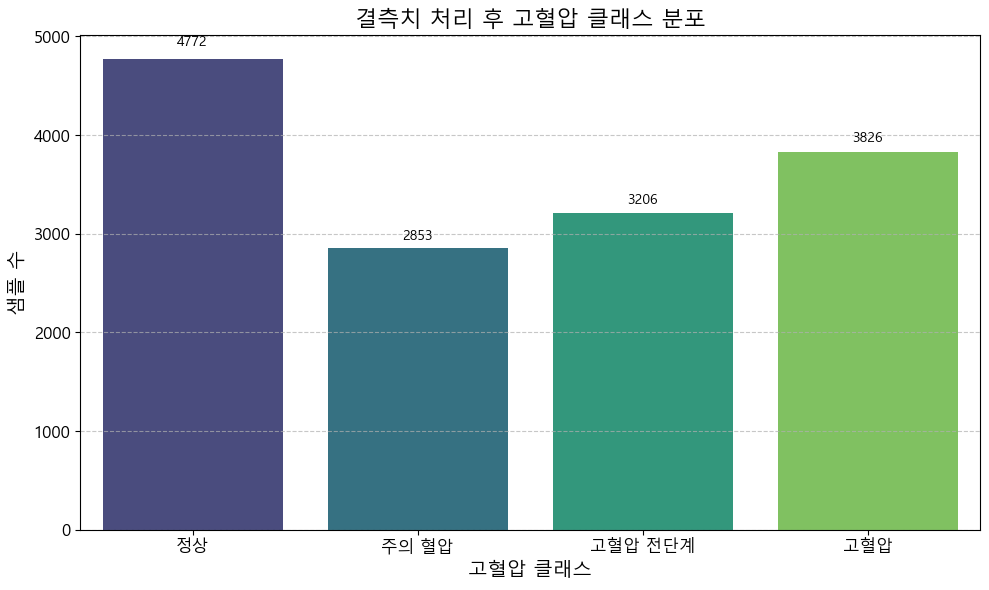


**Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ (ÏàòÏπò):**
HE_HP
Ï†ïÏÉÅ         4772
Í≥†ÌòàÏïï        3826
Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ    3206
Ï£ºÏùò ÌòàÏïï      2853
Name: count, dtype: int64


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm # Ìè∞Ìä∏ ÏÑ§Ï†ïÏö©

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows ÏòàÏãú, Îã§Î•∏ OSÏóêÏÑúÎäî Í≤ΩÎ°úÎ•º ÎßûÏ∂∞Ï£ºÏÑ∏Ïöî)
# 'Malgun Gothic'Ïù¥ ÏóÜÏúºÎ©¥ ÏãúÏä§ÌÖúÏóê ÏÑ§ÏπòÎêú Îã§Î•∏ ÌïúÍ∏Ä Ìè∞Ìä∏Î™ÖÏúºÎ°ú Î≥ÄÍ≤ΩÌï¥Ï£ºÏÑ∏Ïöî (Ïòà: 'AppleGothic', 'NanumGothic').
try:
    plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
    plt.rcParams['axes.unicode_minus'] = False # ÎßàÏù¥ÎÑàÏä§ Ìè∞Ìä∏ Íπ®Ïßê Î∞©ÏßÄ
    print("ÌïúÍ∏Ä Ìè∞Ìä∏ 'Malgun Gothic' ÏÑ§Ï†ï ÏôÑÎ£å.")
except:
    print("ÌïúÍ∏Ä Ìè∞Ìä∏ 'Malgun Gothic'ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Í∏∞Î≥∏ Ìè∞Ìä∏Î°ú Ï∂úÎ†•Îê©ÎãàÎã§.")
    print("ÏÑ§ÏπòÎêú Ìè∞Ìä∏ ÌôïÏù∏: import matplotlib.font_manager as fm; [f.name for f in fm.fontManager.ttflist]")
    print("ÎòêÎäî Îã§Î•∏ Ìè∞Ìä∏Î™ÖÏúºÎ°ú Î≥ÄÍ≤ΩÌï¥Ï£ºÏÑ∏Ïöî (Ïòà: 'AppleGothic', 'NanumGothic').")


# Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§ ÌïúÍ∏Ä ÎùºÎ≤® Îß§Ìïë
label_map = {
    1: "Ï†ïÏÉÅ",
    2: "Ï£ºÏùò ÌòàÏïï",
    3: "Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ",
    4: "Í≥†ÌòàÏïï"
}

# 'HE_HP' Ïª¨ÎüºÏùò Î≥µÏÇ¨Î≥∏ÏùÑ ÎßåÎì§Ïñ¥ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï†Ñ ÏÉÅÌÉúÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
# Ïù¥ Î≥µÏÇ¨Î≥∏Ïóê ÌïúÍ∏Ä ÎùºÎ≤®ÏùÑ Îß§ÌïëÌïòÍ≥†, Í≤∞Ï∏°ÏπòÎèÑ Í∑∏ÎåÄÎ°ú Ìè¨Ìï®ÌïòÏó¨ ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
plot_data_before_imputation = data['HE_HP'].copy()

# Í≤∞Ï∏°Ïπò(NaN) Í∞íÏùÑ ÏãúÍ∞ÅÌôîÏóê Ìè¨Ìï®ÏãúÌÇ§Í∏∞ ÏúÑÌï¥ 'Í≤∞Ï∏°Ïπò' ÎùºÎ≤®Î°ú ÏûÑÏãú Îß§Ìïë
# value_counts()Îäî Í∏∞Î≥∏Ï†ÅÏúºÎ°ú NaNÏùÑ Ï†úÏô∏ÌïòÎØÄÎ°ú, Î™ÖÏãúÏ†ÅÏúºÎ°ú Ìè¨Ìï®ÌïòÍ±∞ÎÇò
# Î≤îÏ£ºÌòïÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ NaNÏùÑ ÌïòÎÇòÏùò Î≤îÏ£ºÎ°ú Ï∑®Í∏âÌïòÍ≤å Ìï† Ïàò ÏûàÏäµÎãàÎã§.
# Ïó¨Í∏∞ÏÑúÎäî plot_data_before_imputationÏóê ÏßÅÏ†ë NaNÏùÑ 'Í≤∞Ï∏°Ïπò'Î°ú Îß§ÌïëÌïòÏó¨ ÏãúÍ∞ÅÌôîÏóê ÎÇòÌÉÄÎÇòÍ≤å Ìï©ÎãàÎã§.
plot_data_before_imputation = plot_data_before_imputation.map(label_map)
plot_data_before_imputation = plot_data_before_imputation.fillna("Í≤∞Ï∏°Ïπò")

# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ: Í∞Å ÌÅ¥ÎûòÏä§Ïùò ÎπàÎèÑÏàò Í≥ÑÏÇ∞
class_counts = plot_data_before_imputation.value_counts(dropna=False) # dropna=FalseÎ°ú NaNÎèÑ Ìè¨Ìï®

# Î∞î Ï∞®Ìä∏Ïùò ÏàúÏÑúÎ•º Ï†ïÏùòÌï©ÎãàÎã§. (Ï†ïÏÉÅ, Ï£ºÏùò, Ï†ÑÎã®Í≥Ñ, Í≥†ÌòàÏïï, Í≤∞Ï∏°Ïπò)
# Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Ïóê Îî∞Îùº Ïù¥ ÏàúÏÑú Î¶¨Ïä§Ìä∏Î•º Ï°∞Ï†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.
order_list = ["Ï†ïÏÉÅ", "Ï£ºÏùò ÌòàÏïï", "Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ", "Í≥†ÌòàÏïï", "Í≤∞Ï∏°Ïπò"]
# Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî ÌÅ¥ÎûòÏä§Îßå ÏàúÏÑú Î¶¨Ïä§Ìä∏Ïóê Ìè¨Ìï®
order_list = [label for label in order_list if label in class_counts.index]


# ÏãúÍ∞ÅÌôî: Ïπ¥Ïö¥Ìä∏ ÌîåÎ°Ø
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis", order=order_list)

plt.title("Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨", fontsize=16)
plt.xlabel("Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§", fontsize=14)
plt.ylabel("ÏÉòÌîå Ïàò", fontsize=14)
plt.xticks(rotation=0, fontsize=12) # xÏ∂ï ÎùºÎ≤® ÏàòÌèâ Ïú†ÏßÄ
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Í∞Å Î∞î ÏúÑÏóê ÏÉòÌîå Ïàò ÌëúÏãú
for index, value in enumerate(class_counts[order_list]): # ÏàúÏÑúÏóê ÎßûÏ∂∞ÏÑú Í∞í Í∞ÄÏ†∏Ïò§Í∏∞
    plt.text(index, value + (value * 0.02), str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

print("\n**Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ (ÏàòÏπò):**")
print(class_counts)

ÌïúÍ∏Ä Ìè∞Ìä∏ 'Malgun Gothic' ÏÑ§Ï†ï ÏôÑÎ£å.
Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï†Ñ Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨ ÏôÑÎ£å.
Ï≤òÎ¶¨ Ï†Ñ HE_HP NaN Í∞úÏàò: 2185Í∞ú
--------------------------------------------------
Ï†úÍ≥µÌï¥Ï£ºÏã† Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏΩîÎìú Ï†ÅÏö© ÏãúÏûë...
HE_HP Í≤∞Ï∏°Ïπò Ï§ë 'DI1_pt=8 & 120<=ÏàòÏ∂ïÍ∏∞<130 & Ïù¥ÏôÑÍ∏∞<80' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 2Î°ú Ï±ÑÏõÄ. (149Í∞ú)
HE_HP Í≤∞Ï∏°Ïπò Ï§ë 'DI1_pt=8 & 130<=ÏàòÏ∂ïÍ∏∞<140 & Ïù¥ÏôÑÍ∏∞<90' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 3Î°ú Ï±ÑÏõÄ. (46Í∞ú)
HE_HP Í≤∞Ï∏°Ïπò Ï§ë 'DI1_pt=8 & (ÏàòÏ∂ïÍ∏∞>=140 ÎòêÎäî Ïù¥ÏôÑÍ∏∞>=90)' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 4Î°ú Ï±ÑÏõÄ. (23Í∞ú)
ÎÇ®ÏùÄ HE_HP Í≤∞Ï∏°Ïπò (1967Í∞ú) Ï†úÍ±∞ ÏôÑÎ£å.

HE_HP NaN count after all processing: 0
HE_HP ÏµúÏ¢Ö Î∂ÑÌè¨:
HE_HP
1.0    4772
4.0    3826
3.0    3206
2.0    2853
Name: count, dtype: int64
Ï†úÍ≥µÌï¥Ï£ºÏã† Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏΩîÎìú Ï†ÅÏö© ÏôÑÎ£å.
--------------------------------------------------
Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨ ÏôÑÎ£å.
Ï≤òÎ¶¨ ÌõÑ HE_HP NaN Í∞úÏàò: 0Í∞ú
--------------------------------------

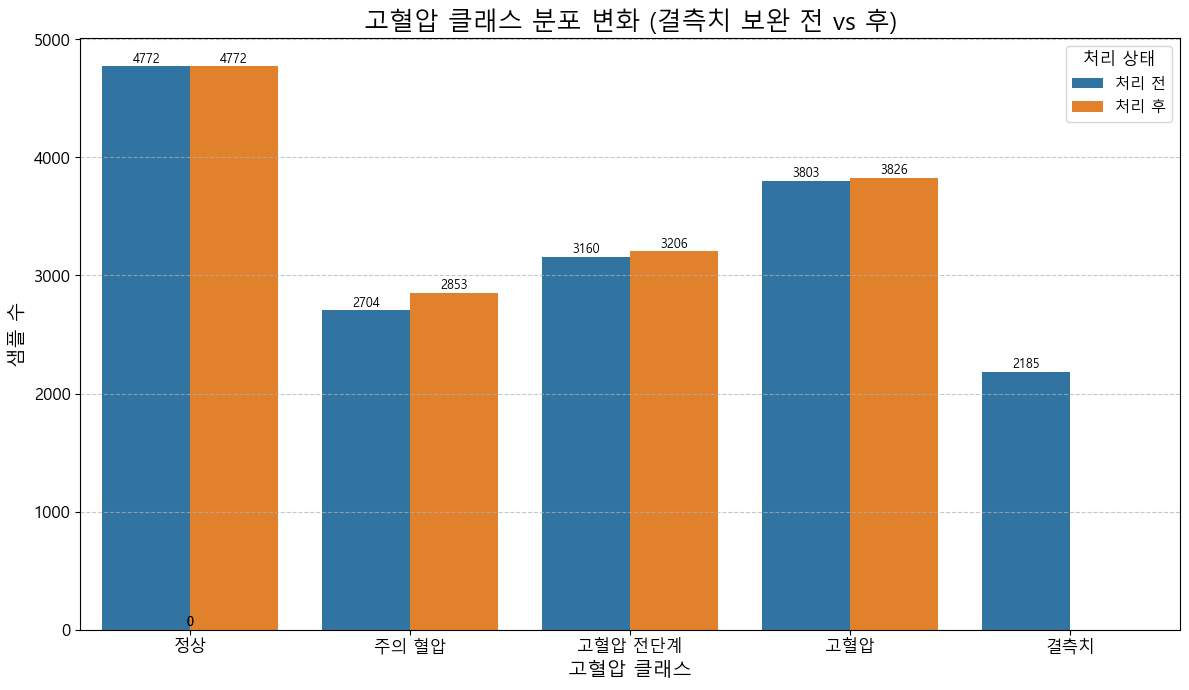


--- Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉòÌîå Ïàò Î≥ÄÌôî ÏöîÏïΩ ---
Í≤∞Ï∏°Ïπò Î≥¥ÏôÑ Ï†Ñ:
 HE_HP
1.0    Í≤∞Ï∏°Ïπò
2.0    Í≤∞Ï∏°Ïπò
3.0    Í≤∞Ï∏°Ïπò
4.0    Í≤∞Ï∏°Ïπò
NaN    Í≤∞Ï∏°Ïπò
Name: count, dtype: object

Í≤∞Ï∏°Ïπò Î≥¥ÏôÑ ÌõÑ:
 HE_HP
1.0    Í≤∞Ï∏°Ïπò
2.0    Í≤∞Ï∏°Ïπò
3.0    Í≤∞Ï∏°Ïπò
4.0    Í≤∞Ï∏°Ïπò
Name: count, dtype: object


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
try:
    plt.rcParams['font.family'] = 'Malgun Gothic' # Windows ÏÇ¨Ïö©Ïûê
    plt.rcParams['axes.unicode_minus'] = False # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ
    print("ÌïúÍ∏Ä Ìè∞Ìä∏ 'Malgun Gothic' ÏÑ§Ï†ï ÏôÑÎ£å.")
except:
    print("ÌïúÍ∏Ä Ìè∞Ìä∏ 'Malgun Gothic'ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Í∏∞Î≥∏ Ìè∞Ìä∏Î°ú Ï∂úÎ†•Îê©ÎãàÎã§.")
    print("ÏÑ§ÏπòÎêú Ìè∞Ìä∏ ÌôïÏù∏: import matplotlib.font_manager as fm; [f.name for f in fm.fontManager.ttflist]")
    print("ÎòêÎäî Îã§Î•∏ Ìè∞Ìä∏Î™ÖÏúºÎ°ú Î≥ÄÍ≤ΩÌï¥Ï£ºÏÑ∏Ïöî (Ïòà: 'AppleGothic', 'NanumGothic').")



# --- 1. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ 'Ï†Ñ' Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ Í∏∞Î°ù ---
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï†ÑÏùò HE_HP Ïª¨Îüº Î≥µÏÇ¨Î≥∏ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
# Ïù¥ ÏãúÏ†êÏùò dataÎäî Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏΩîÎìúÍ∞Ä Ï†ÅÏö©ÎêòÍ∏∞ Ï†ÑÏùò ÏÉÅÌÉúÏó¨Ïïº Ìï©ÎãàÎã§.
data_before_imputation = data['HE_HP'].copy()
print("Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï†Ñ Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨ ÏôÑÎ£å.")
print(f"Ï≤òÎ¶¨ Ï†Ñ HE_HP NaN Í∞úÏàò: {data_before_imputation.isnull().sum()}Í∞ú")
print("-" * 50)


# --- 2. Ï†úÍ≥µÌï¥Ï£ºÏã† HE_HP Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏΩîÎìú Ï†ÅÏö© ---
print("Ï†úÍ≥µÌï¥Ï£ºÏã† Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏΩîÎìú Ï†ÅÏö© ÏãúÏûë...")

# 1. 9, 99, 999, 888 Îì±ÏùÑ NaNÏúºÎ°ú Ï≤òÎ¶¨
data['HE_HP'] = data['HE_HP'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)


# Ï°∞Í±¥ 1-1: DE1_pt 8 (ÏùòÏÇ¨ ÏßÑÎã® ÏóÜÏùå) & HE_DM_HbA1cÍ∞Ä NaN & Í≥µÎ≥µÌòàÎãπ Ï†ïÏÉÅ (70 < HE_glu < 100)
# Ïù¥ Î∂ÄÎ∂ÑÏùÄ HE_DM_HbA1c Ïª¨ÎüºÏóê ÎåÄÌïú Ï≤òÎ¶¨Ïù¥ÎØÄÎ°ú HE_HP ÏãúÍ∞ÅÌôîÏóêÎäî ÏßÅÏ†ëÏ†Å ÏòÅÌñ• ÏóÜÏùå
# ÌïòÏßÄÎßå ÏΩîÎìú ÌùêÎ¶ÑÏÉÅ Ïú†ÏßÄ
condition_glu_normal = (
    data['DE1_pt'] == 8
) & (
    data['HE_DM_HbA1c'].isnull()
) & (
   (data['HE_glu'] > 70) & (data['HE_glu'] < 100) # Í¥ÑÌò∏ Ï∂îÍ∞ÄÌïòÏó¨ Í∞ÄÎèÖÏÑ± Í∞úÏÑ†
)
# data.loc[condition_glu_normal, 'HE_DM_HbA1c'] = 1 # 1: ÎãπÎá® Ï†ïÏÉÅ
# print(f"HE_DM_HbA1c Í≤∞Ï∏°Ïπò Ï§ë 'DE1_pt=8 & Í≥µÎ≥µÌòàÎãπ<100' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 1Î°ú Ï±ÑÏõÄ. ({condition_glu_normal.sum()}Í∞ú)")
# ÏúÑÏóê Ï£ºÏÑùÏ≤òÎ¶¨ÎêòÏñ¥ ÏûàÏóàÏúºÎØÄÎ°ú Îã§Ïãú Ï£ºÏÑù Ï≤òÎ¶¨Ìï©ÎãàÎã§.

# Ï°∞Í±¥ 1-2: DI1_pt 8 (ÏùòÏÇ¨ ÏßÑÎã® ÏóÜÏùå) & HE_HP NaN & ÏàòÏ∂ïÍ∏∞,Ïù¥ÏôÑÍ∏∞ ÌòàÏïï 'Ï£ºÏùò ÌòàÏïï' Î≤îÏúÑ
condition_hp_pre_attention = (
    data['DI1_pt'] == 8
) & (
    data['HE_HP'].isnull()
) & (
    (data['HE_sbp1'] >= 120) & (data['HE_sbp1'] < 130) & (data['HE_dbp1'] < 80)
)
data.loc[condition_hp_pre_attention, 'HE_HP'] = 2 # 2: Ï£ºÏùò ÌòàÏïï
print(f"HE_HP Í≤∞Ï∏°Ïπò Ï§ë 'DI1_pt=8 & 120<=ÏàòÏ∂ïÍ∏∞<130 & Ïù¥ÏôÑÍ∏∞<80' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 2Î°ú Ï±ÑÏõÄ. ({condition_hp_pre_attention.sum()}Í∞ú)")


# Ï°∞Í±¥ 1-3: DI1_pt 8 (ÏùòÏÇ¨ ÏßÑÎã® ÏóÜÏùå) & HE_HP NaN & ÏàòÏ∂ïÍ∏∞,Ïù¥ÏôÑÍ∏∞ ÌòàÏïï 'Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ' Î≤îÏúÑ
condition_hp_pre_hypertension = (
    data['DI1_pt'] == 8
) & (
    data['HE_HP'].isnull()
) & (
    (data['HE_sbp1'] >= 130) & (data['HE_sbp1'] < 140) & (data['HE_dbp1'] < 90)
)
data.loc[condition_hp_pre_hypertension, 'HE_HP'] = 3 # 3: Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ
print(f"HE_HP Í≤∞Ï∏°Ïπò Ï§ë 'DI1_pt=8 & 130<=ÏàòÏ∂ïÍ∏∞<140 & Ïù¥ÏôÑÍ∏∞<90' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 3Î°ú Ï±ÑÏõÄ. ({condition_hp_pre_hypertension.sum()}Í∞ú)")


# Ï°∞Í±¥ 1-4: DI1_pt 8 (ÏùòÏÇ¨ ÏßÑÎã® ÏóÜÏùå) & HE_HP NaN & ÏàòÏ∂ïÍ∏∞,Ïù¥ÏôÑÍ∏∞ ÌòàÏïï 'Í≥†ÌòàÏïï' Î≤îÏúÑ
condition_hp_hypertension = (
    data['DI1_pt'] == 8
) & (
    data['HE_HP'].isnull()
) & (
    (data['HE_sbp1'] >= 140) | (data['HE_dbp1'] >= 90)
)
data.loc[condition_hp_hypertension, 'HE_HP'] = 4 # 4: Í≥†ÌòàÏïï
print(f"HE_HP Í≤∞Ï∏°Ïπò Ï§ë 'DI1_pt=8 & (ÏàòÏ∂ïÍ∏∞>=140 ÎòêÎäî Ïù¥ÏôÑÍ∏∞>=90)' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 4Î°ú Ï±ÑÏõÄ. ({condition_hp_hypertension.sum()}Í∞ú)")


# 3. ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÌïòÍ±∞ÎÇò Îã§Î•∏ Î∞©ÏãùÏúºÎ°ú Ï≤òÎ¶¨
if data['HE_HP'].isnull().any():
    initial_nan_count_after_fill = data['HE_HP'].isnull().sum()
    data = data[data['HE_HP'].notnull()].copy() # .copy()Î•º Ï∂îÍ∞ÄÌïòÏó¨ SettingWithCopyWarning Î∞©ÏßÄ
    print(f"ÎÇ®ÏùÄ HE_HP Í≤∞Ï∏°Ïπò ({initial_nan_count_after_fill}Í∞ú) Ï†úÍ±∞ ÏôÑÎ£å.")
else:
    print("Î™®Îì† HE_HP Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨Í∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

print(f"\nHE_HP NaN count after all processing: {data['HE_HP'].isnull().sum()}")
print("HE_HP ÏµúÏ¢Ö Î∂ÑÌè¨:")
print(data['HE_HP'].value_counts(dropna=False))
print("Ï†úÍ≥µÌï¥Ï£ºÏã† Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏΩîÎìú Ï†ÅÏö© ÏôÑÎ£å.")
print("-" * 50)

# --- 3. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ 'ÌõÑ' Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ Í∏∞Î°ù ---
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑÏùò HE_HP Ïª¨Îüº ÏÉÅÌÉúÎäî Ïù¥ÎØ∏ 'data'Ïóê Î∞òÏòÅÎêòÏñ¥ ÏûàÏäµÎãàÎã§.
data_after_imputation = data['HE_HP'].copy()
print("Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨ ÏôÑÎ£å.")
print(f"Ï≤òÎ¶¨ ÌõÑ HE_HP NaN Í∞úÏàò: {data_after_imputation.isnull().sum()}Í∞ú")
print("-" * 50)


# --- 4. ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ ÌÜµÌï© Î∞è Ï§ÄÎπÑ ---
# Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§ ÌïúÍ∏Ä ÎùºÎ≤® Îß§Ìïë
label_map = {
    1: "Ï†ïÏÉÅ",
    2: "Ï£ºÏùò ÌòàÏïï",
    3: "Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ",
    4: "Í≥†ÌòàÏïï"
}

# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï†ÑÌõÑÏùò Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ÎπàÎèÑ Í≥ÑÏÇ∞
counts_before = data_before_imputation.value_counts(dropna=False).sort_index()
counts_after = data_after_imputation.value_counts(dropna=False).sort_index()

# DataFrameÏúºÎ°ú Î≥ÄÌôò Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω
df_before = counts_before.to_frame(name='ÏÉòÌîå Ïàò').reset_index()
# `reset_index()` ÌõÑ ÏÉùÏÑ±ÎêòÎäî Ïª¨Îüº Ïù¥Î¶ÑÏùÄ `HE_HP`ÏûÖÎãàÎã§.
df_before['HE_HP_label'] = df_before['HE_HP'].map(label_map).fillna("Í≤∞Ï∏°Ïπò")
df_before['Ï≤òÎ¶¨ ÏÉÅÌÉú'] = 'Ï≤òÎ¶¨ Ï†Ñ'

df_after = counts_after.to_frame(name='ÏÉòÌîå Ïàò').reset_index()
# `reset_index()` ÌõÑ ÏÉùÏÑ±ÎêòÎäî Ïª¨Îüº Ïù¥Î¶ÑÏùÄ `HE_HP`ÏûÖÎãàÎã§.
df_after['HE_HP_label'] = df_after['HE_HP'].map(label_map).fillna("Í≤∞Ï∏°Ïπò")
df_after['Ï≤òÎ¶¨ ÏÉÅÌÉú'] = 'Ï≤òÎ¶¨ ÌõÑ'

# Îëê DataFrame Î≥ëÌï©
merged_plot_data = pd.concat([df_before, df_after])

# Î∞î Ï∞®Ìä∏Ïùò ÏàúÏÑúÎ•º Ï†ïÏùòÌï©ÎãàÎã§. (Ï†ïÏÉÅ, Ï£ºÏùò ÌòàÏïï, Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ, Í≥†ÌòàÏïï, Í≤∞Ï∏°Ïπò)
# Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Ïóê Ï°¥Ïû¨ÌïòÎäî ÌÅ¥ÎûòÏä§Îßå ÏàúÏÑú Î¶¨Ïä§Ìä∏Ïóê Ìè¨Ìï®
order_list = ["Ï†ïÏÉÅ", "Ï£ºÏùò ÌòàÏïï", "Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ", "Í≥†ÌòàÏïï", "Í≤∞Ï∏°Ïπò"]
actual_classes_in_data = merged_plot_data['HE_HP_label'].unique()
ordered_actual_classes = [label for label in order_list if label in actual_classes_in_data]


# --- 5. ÏãúÍ∞ÅÌôî (Í∑∏Î£πÌôîÎêú Î∞î Ï∞®Ìä∏) ---
plt.figure(figsize=(12, 7))

# Ïó¨Í∏∞ÏóêÏÑú paletteÎ•º ÎåÄÎπÑÎêòÎäî ÏÉâÏÉÅÏúºÎ°ú Î≥ÄÍ≤ΩÌï©ÎãàÎã§.
# 'mako'Îäî ÏßÑÌïú ÌååÎûë-Î≥¥Îùº Í≥ÑÏó¥, 'rocket'ÏùÄ ÏßÑÌïú Îπ®Í∞ï-Ï£ºÌô© Í≥ÑÏó¥ÏûÖÎãàÎã§.
# 'viridis'ÏôÄ Í∞ôÏùÄ Îã®Ïùº ÌÜ§ ÌåîÎ†àÌä∏ ÎåÄÏã† ÎåÄÎπÑÍ∞Ä Í∞ïÌïú ÌåîÎ†àÌä∏Î•º ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò ÏßÅÏ†ë ÏÉâÏÉÅÏùÑ ÏßÄÏ†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.
# ÏòàÏãú: palette=['#1f77b4', '#ff7f0e'] (ÌååÎûÄÏÉâÍ≥º Ï£ºÌô©ÏÉâ)
sns.barplot(x='HE_HP_label', y='ÏÉòÌîå Ïàò', hue='Ï≤òÎ¶¨ ÏÉÅÌÉú', data=merged_plot_data,
            palette=['#1f77b4', '#ff7f0e'], # ÎåÄÎπÑÍ∞Ä Í∞ïÌïú ÌååÎûÄÏÉâÍ≥º Ï£ºÌô©ÏÉâÏúºÎ°ú Î≥ÄÍ≤Ω
            order=ordered_actual_classes)

plt.title("Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ Î≥ÄÌôî (Í≤∞Ï∏°Ïπò Î≥¥ÏôÑ Ï†Ñ vs ÌõÑ)", fontsize=18)
plt.xlabel("Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§", fontsize=14)
plt.ylabel("ÏÉòÌîå Ïàò", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Ï≤òÎ¶¨ ÏÉÅÌÉú", fontsize=11, title_fontsize=12, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Í∞Å Î∞î ÏúÑÏóê ÏÉòÌîå Ïàò ÌëúÏãú
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.tight_layout()
plt.show()

print("\n--- Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉòÌîå Ïàò Î≥ÄÌôî ÏöîÏïΩ ---")
print("Í≤∞Ï∏°Ïπò Î≥¥ÏôÑ Ï†Ñ:\n", data_before_imputation.value_counts(dropna=False).map(label_map).fillna("Í≤∞Ï∏°Ïπò").sort_index())
print("\nÍ≤∞Ï∏°Ïπò Î≥¥ÏôÑ ÌõÑ:\n", data_after_imputation.value_counts(dropna=False).map(label_map).fillna("Í≤∞Ï∏°Ïπò").sort_index())

ÌïúÍ∏Ä Ìè∞Ìä∏ 'Malgun Gothic' ÏÑ§Ï†ï ÏôÑÎ£å.
Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï†Ñ Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨ ÏôÑÎ£å.
Ï≤òÎ¶¨ Ï†Ñ HE_DM_HbA1c NaN Í∞úÏàò: 4682Í∞ú
--------------------------------------------------
Ï†úÍ≥µÌï¥Ï£ºÏã† Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏΩîÎìú Ï†ÅÏö© ÏãúÏûë...
HE_DM_HbA1c Í≤∞Ï∏°Ïπò Ï§ë 'DE1_pt=8 & Í≥µÎ≥µÌòàÎãπ<100' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 1Î°ú Ï±ÑÏõÄ. (4391Í∞ú)
HE_DM_HbA1c Í≤∞Ï∏°Ïπò Ï§ë 'DE1_pt=8 & 100<=Í≥µÎ≥µÌòàÎãπ<=125' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 2Î°ú Ï±ÑÏõÄ. (0Í∞ú)
HE_DM_HbA1c Í≤∞Ï∏°Ïπò Ï§ë 'DE1_pt=8 & Í≥µÎ≥µÌòàÎãπ>=126' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 3ÏúºÎ°ú Ï±ÑÏõÄ. (0Í∞ú)
ÎÇ®ÏùÄ HE_DM_HbA1c Í≤∞Ï∏°Ïπò (291Í∞ú) Ï†úÍ±∞ ÏôÑÎ£å.
\HE_DM_HbA1c NaN count after all processing: 0
HE_DM_HbA1c ÏµúÏ¢Ö Î∂ÑÌè¨:
HE_DM_HbA1c
1.0    10456
2.0     4046
3.0     1831
Name: count, dtype: int64
Ï†úÍ≥µÌï¥Ï£ºÏã† Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏΩîÎìú Ï†ÅÏö© ÏôÑÎ£å.
--------------------------------------------------
Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨ ÏôÑÎ£å.
Ï≤òÎ¶¨ ÌõÑ HE_DM_HbA1c NaN Í∞úÏàò: 0Í∞ú
----------------------------------------

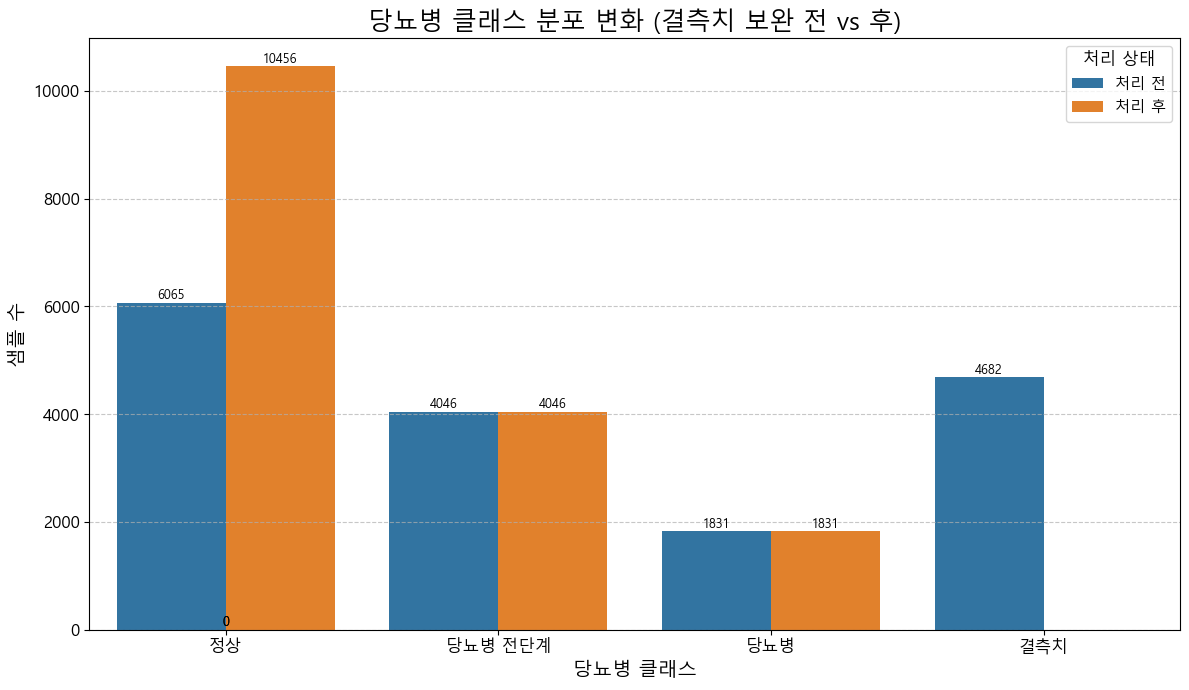


--- Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉòÌîå Ïàò Î≥ÄÌôî ÏöîÏïΩ ---
Í≤∞Ï∏°Ïπò Î≥¥ÏôÑ Ï†Ñ:
 HE_DM_HbA1c
1.0    Í≤∞Ï∏°Ïπò
2.0    Í≤∞Ï∏°Ïπò
3.0    Í≤∞Ï∏°Ïπò
NaN    Í≤∞Ï∏°Ïπò
Name: count, dtype: object

Í≤∞Ï∏°Ïπò Î≥¥ÏôÑ ÌõÑ:
 HE_DM_HbA1c
1.0    Í≤∞Ï∏°Ïπò
2.0    Í≤∞Ï∏°Ïπò
3.0    Í≤∞Ï∏°Ïπò
Name: count, dtype: object


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
try:
    plt.rcParams['font.family'] = 'Malgun Gothic' # Windows ÏÇ¨Ïö©Ïûê
    plt.rcParams['axes.unicode_minus'] = False # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ
    print("ÌïúÍ∏Ä Ìè∞Ìä∏ 'Malgun Gothic' ÏÑ§Ï†ï ÏôÑÎ£å.")
except:
    print("ÌïúÍ∏Ä Ìè∞Ìä∏ 'Malgun Gothic'ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Í∏∞Î≥∏ Ìè∞Ìä∏Î°ú Ï∂úÎ†•Îê©ÎãàÎã§.")
    print("ÏÑ§ÏπòÎêú Ìè∞Ìä∏ ÌôïÏù∏: import matplotlib.font_manager as fm; [f.name for f in fm.fontManager.ttflist]")
    print("ÎòêÎäî Îã§Î•∏ Ìè∞Ìä∏Î™ÖÏúºÎ°ú Î≥ÄÍ≤ΩÌï¥Ï£ºÏÑ∏Ïöî (Ïòà: 'AppleGothic', 'NanumGothic').")



# --- 1. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ 'Ï†Ñ' Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ Í∏∞Î°ù ---
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï†ÑÏùò HE_HP Ïª¨Îüº Î≥µÏÇ¨Î≥∏ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
# Ïù¥ ÏãúÏ†êÏùò dataÎäî Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏΩîÎìúÍ∞Ä Ï†ÅÏö©ÎêòÍ∏∞ Ï†ÑÏùò ÏÉÅÌÉúÏó¨Ïïº Ìï©ÎãàÎã§.
data_before_imputation = data['HE_DM_HbA1c'].copy()
print("Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï†Ñ Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨ ÏôÑÎ£å.")
print(f"Ï≤òÎ¶¨ Ï†Ñ HE_DM_HbA1c NaN Í∞úÏàò: {data_before_imputation.isnull().sum()}Í∞ú")
print("-" * 50)


# --- 2. Ï†úÍ≥µÌï¥Ï£ºÏã† HE_HP Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏΩîÎìú Ï†ÅÏö© ---
print("Ï†úÍ≥µÌï¥Ï£ºÏã† Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏΩîÎìú Ï†ÅÏö© ÏãúÏûë...")

# 1. 9, 99, 999, 888 Îì±ÏùÑ NaNÏúºÎ°ú Ï≤òÎ¶¨
data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)

# Ï°∞Í±¥ 1-1: DE1_pt 8 (ÏùòÏÇ¨ ÏßÑÎã® ÏóÜÏùå) & HE_DM_HbA1cÍ∞Ä NaN & Í≥µÎ≥µÌòàÎãπ Ï†ïÏÉÅ (70 < HE_glu < 100)
condition_glu_normal = (
    data['DE1_pt'] == 8
) & (
    data['HE_DM_HbA1c'].isnull()
) & (
   (data['HE_glu'] > 70) & data['HE_glu'] < 100
)
data.loc[condition_glu_normal, 'HE_DM_HbA1c'] = 1 # 1: ÎãπÎá® Ï†ïÏÉÅ
print(f"HE_DM_HbA1c Í≤∞Ï∏°Ïπò Ï§ë 'DE1_pt=8 & Í≥µÎ≥µÌòàÎãπ<100' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 1Î°ú Ï±ÑÏõÄ. ({condition_glu_normal.sum()}Í∞ú)")


# Ï°∞Í±¥ 1-2: DE1_pt 8 (ÏùòÏÇ¨ ÏßÑÎã® ÏóÜÏùå) & HE_DM_HbA1cÍ∞Ä NaN & Í≥µÎ≥µÌòàÎãπÏû•Ïï† (100 <= HE_glu <= 125)
condition_glu_pre_diabetes = (
    data['DE1_pt'] == 8
) & (
    data['HE_DM_HbA1c'].isnull()
) & (
    (data['HE_glu'] >= 100) & (data['HE_glu'] <= 125)
)
data.loc[condition_glu_pre_diabetes, 'HE_DM_HbA1c'] = 2 #ÎãπÎá®Î≥ë Ï†ÑÎã®Í≥Ñ
print(f"HE_DM_HbA1c Í≤∞Ï∏°Ïπò Ï§ë 'DE1_pt=8 & 100<=Í≥µÎ≥µÌòàÎãπ<=125' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 2Î°ú Ï±ÑÏõÄ. ({condition_glu_pre_diabetes.sum()}Í∞ú)")

# Ï°∞Í±¥ 1-3: DE1_pt 0 (ÏùòÏÇ¨ ÏßÑÎã® ÏóÜÏùå) & HE_DM_HbA1cÍ∞Ä NaN & Í≥µÎ≥µÌòàÎãπ ÎãπÎá® >= 126
# Ïù¥Îäî ÏùòÏÇ¨ ÏßÑÎã®ÏùÄ ÏóÜÏßÄÎßå Í≥µÎ≥µÌòàÎãπÏúºÎ°ú Î≥º Îïå ÎãπÎá®Î≥ëÏúºÎ°ú ÏùòÏã¨ÎêòÎäî Í≤ΩÏö∞ÏûÖÎãàÎã§.
condition_glu_diabetes_suspect = (
    data['DE1_pt'] == 8
) & (
    data['HE_DM_HbA1c'].isnull()
) & (
    data['HE_glu'] >= 126
)
data.loc[condition_glu_diabetes_suspect, 'HE_DM_HbA1c'] = 3 # 3: ÎãπÎá®Î≥ë
print(f"HE_DM_HbA1c Í≤∞Ï∏°Ïπò Ï§ë 'DE1_pt=8 & Í≥µÎ≥µÌòàÎãπ>=126' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 3ÏúºÎ°ú Ï±ÑÏõÄ. ({condition_glu_diabetes_suspect.sum()}Í∞ú)")


# 3. ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÌïòÍ±∞ÎÇò Îã§Î•∏ Î∞©ÏãùÏúºÎ°ú Ï≤òÎ¶¨ (Í∏∞Ï°¥Í≥º ÎèôÏùº)
#    ÏúÑÏóêÏÑú Ï†ïÏùòÎêòÏßÄ ÏïäÏùÄ ÏºÄÏù¥Ïä§ (Ïòà: HE_gluÍ∞Ä NaNÏù¥Í±∞ÎÇò Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇòÎäî Í≤ΩÏö∞, ÎòêÎäî Îã§Î•∏ Ïù¥Ïú†Î°ú ÎÇ®ÏùÄ NaN)
#    Ïù¥ÌõÑ Î™®Îç∏ ÌïôÏäµÏóê ÏòÅÌñ•ÏùÑ Ï£ºÏßÄ ÏïäÎèÑÎ°ù Ï≤òÎ¶¨Ìï©ÎãàÎã§.
if data['HE_DM_HbA1c'].isnull().any():
    initial_nan_count_after_fill = data['HE_DM_HbA1c'].isnull().sum()
    data = data[data['HE_DM_HbA1c'].notnull()] # Í≤∞Ï∏°Ïπò Ï†úÍ±∞
    print(f"ÎÇ®ÏùÄ HE_DM_HbA1c Í≤∞Ï∏°Ïπò ({initial_nan_count_after_fill}Í∞ú) Ï†úÍ±∞ ÏôÑÎ£å.")
else:
    print("Î™®Îì† HE_DM_HbA1c Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨Í∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

print(f"\HE_DM_HbA1c NaN count after all processing: {data['HE_DM_HbA1c'].isnull().sum()}")
print("HE_DM_HbA1c ÏµúÏ¢Ö Î∂ÑÌè¨:")
print(data['HE_DM_HbA1c'].value_counts(dropna=False))
print("Ï†úÍ≥µÌï¥Ï£ºÏã† Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏΩîÎìú Ï†ÅÏö© ÏôÑÎ£å.")
print("-" * 50)

# --- 3. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ 'ÌõÑ' Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ Í∏∞Î°ù ---
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑÏùò HE_DM_HbA1c Ïª¨Îüº ÏÉÅÌÉúÎäî Ïù¥ÎØ∏ 'data'Ïóê Î∞òÏòÅÎêòÏñ¥ ÏûàÏäµÎãàÎã§.
data_after_imputation = data['HE_DM_HbA1c'].copy()
print("Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨ ÏôÑÎ£å.")
print(f"Ï≤òÎ¶¨ ÌõÑ HE_DM_HbA1c NaN Í∞úÏàò: {data_after_imputation.isnull().sum()}Í∞ú")
print("-" * 50)


# --- 4. ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ ÌÜµÌï© Î∞è Ï§ÄÎπÑ ---
# Í≥†ÌòàÏïï ÌÅ¥ÎûòÏä§ ÌïúÍ∏Ä ÎùºÎ≤® Îß§Ìïë
label_map = {
    1: "Ï†ïÏÉÅ",
    2: "ÎãπÎá®Î≥ë Ï†ÑÎã®Í≥Ñ",
    3: "ÎãπÎá®Î≥ë"
}

# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï†ÑÌõÑÏùò Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ÎπàÎèÑ Í≥ÑÏÇ∞
counts_before = data_before_imputation.value_counts(dropna=False).sort_index()
counts_after = data_after_imputation.value_counts(dropna=False).sort_index()

# DataFrameÏúºÎ°ú Î≥ÄÌôò Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω
df_before = counts_before.to_frame(name='ÏÉòÌîå Ïàò').reset_index()
# `reset_index()` ÌõÑ ÏÉùÏÑ±ÎêòÎäî Ïª¨Îüº Ïù¥Î¶ÑÏùÄ `HE_DM_HbA1c`ÏûÖÎãàÎã§.
df_before['HE_DM_HbA1c_label'] = df_before['HE_DM_HbA1c'].map(label_map).fillna("Í≤∞Ï∏°Ïπò")
df_before['Ï≤òÎ¶¨ ÏÉÅÌÉú'] = 'Ï≤òÎ¶¨ Ï†Ñ'

df_after = counts_after.to_frame(name='ÏÉòÌîå Ïàò').reset_index()
# `reset_index()` ÌõÑ ÏÉùÏÑ±ÎêòÎäî Ïª¨Îüº Ïù¥Î¶ÑÏùÄ `HE_DM_HbA1c`ÏûÖÎãàÎã§.
df_after['HE_DM_HbA1c_label'] = df_after['HE_DM_HbA1c'].map(label_map).fillna("Í≤∞Ï∏°Ïπò")
df_after['Ï≤òÎ¶¨ ÏÉÅÌÉú'] = 'Ï≤òÎ¶¨ ÌõÑ'

# Îëê DataFrame Î≥ëÌï©
merged_plot_data = pd.concat([df_before, df_after])

# Î∞î Ï∞®Ìä∏Ïùò ÏàúÏÑúÎ•º Ï†ïÏùòÌï©ÎãàÎã§. (Ï†ïÏÉÅ, Ï£ºÏùò ÌòàÏïï, Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ, Í≥†ÌòàÏïï, Í≤∞Ï∏°Ïπò)
# Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Ïóê Ï°¥Ïû¨ÌïòÎäî ÌÅ¥ÎûòÏä§Îßå ÏàúÏÑú Î¶¨Ïä§Ìä∏Ïóê Ìè¨Ìï®
order_list = ["Ï†ïÏÉÅ", "ÎãπÎá®Î≥ë Ï†ÑÎã®Í≥Ñ", "ÎãπÎá®Î≥ë", "Í≤∞Ï∏°Ïπò"]
actual_classes_in_data = merged_plot_data['HE_DM_HbA1c_label'].unique()
ordered_actual_classes = [label for label in order_list if label in actual_classes_in_data]


# --- 5. ÏãúÍ∞ÅÌôî (Í∑∏Î£πÌôîÎêú Î∞î Ï∞®Ìä∏) ---
plt.figure(figsize=(12, 7))

# Ïó¨Í∏∞ÏóêÏÑú paletteÎ•º ÎåÄÎπÑÎêòÎäî ÏÉâÏÉÅÏúºÎ°ú Î≥ÄÍ≤ΩÌï©ÎãàÎã§.
# 'mako'Îäî ÏßÑÌïú ÌååÎûë-Î≥¥Îùº Í≥ÑÏó¥, 'rocket'ÏùÄ ÏßÑÌïú Îπ®Í∞ï-Ï£ºÌô© Í≥ÑÏó¥ÏûÖÎãàÎã§.
# 'viridis'ÏôÄ Í∞ôÏùÄ Îã®Ïùº ÌÜ§ ÌåîÎ†àÌä∏ ÎåÄÏã† ÎåÄÎπÑÍ∞Ä Í∞ïÌïú ÌåîÎ†àÌä∏Î•º ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò ÏßÅÏ†ë ÏÉâÏÉÅÏùÑ ÏßÄÏ†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.
# ÏòàÏãú: palette=['#1f77b4', '#ff7f0e'] (ÌååÎûÄÏÉâÍ≥º Ï£ºÌô©ÏÉâ)
sns.barplot(x='HE_DM_HbA1c_label', y='ÏÉòÌîå Ïàò', hue='Ï≤òÎ¶¨ ÏÉÅÌÉú', data=merged_plot_data,
            palette=['#1f77b4', '#ff7f0e'], # ÎåÄÎπÑÍ∞Ä Í∞ïÌïú ÌååÎûÄÏÉâÍ≥º Ï£ºÌô©ÏÉâÏúºÎ°ú Î≥ÄÍ≤Ω
            order=ordered_actual_classes)

plt.title("ÎãπÎá®Î≥ë ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ Î≥ÄÌôî (Í≤∞Ï∏°Ïπò Î≥¥ÏôÑ Ï†Ñ vs ÌõÑ)", fontsize=18)
plt.xlabel("ÎãπÎá®Î≥ë ÌÅ¥ÎûòÏä§", fontsize=14)
plt.ylabel("ÏÉòÌîå Ïàò", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Ï≤òÎ¶¨ ÏÉÅÌÉú", fontsize=11, title_fontsize=12, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Í∞Å Î∞î ÏúÑÏóê ÏÉòÌîå Ïàò ÌëúÏãú
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.tight_layout()
plt.show()

print("\n--- Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉòÌîå Ïàò Î≥ÄÌôî ÏöîÏïΩ ---")
print("Í≤∞Ï∏°Ïπò Î≥¥ÏôÑ Ï†Ñ:\n", data_before_imputation.value_counts(dropna=False).map(label_map).fillna("Í≤∞Ï∏°Ïπò").sort_index())
print("\nÍ≤∞Ï∏°Ïπò Î≥¥ÏôÑ ÌõÑ:\n", data_after_imputation.value_counts(dropna=False).map(label_map).fillna("Í≤∞Ï∏°Ïπò").sort_index())

**Ï†ÑÏ≤òÎ¶¨ ÌõÑ EDA**

In [3]:
data = pd.read_csv("ÏµúÏ¢Ö_Í±¥Í∞ïÍ≤ÄÏßÑ_Îç∞Ïù¥ÌÑ∞ÏÖã(Í∞ÄÍ≥µÎêú).csv")

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # ÏòàÏãú: ÎßëÏùÄ Í≥†ÎîïÏúºÎ°ú ÏÑ§Ï†ï (Windows ÌôòÍ≤Ω Ïãú)
plt.rcParams['axes.unicode_minus'] = False

**ÌîºÏ≤òÏÖÄÎ†â:Ï†ÑÏßÑÏÑ†ÌÉùÎ≤ï (Í≥†ÌòàÏïï) **

In [9]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
num_features = [
    'age', 'sex', 'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt'
]
X = data[num_features]
y = data['HE_HP'].astype(int)- 1

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

# ÏÇ¨Ïö©Ìï† Î™®Îç∏Îì§
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'HistGB': HistGradientBoostingClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

# Í≤∞Í≥º Ï†ÄÏû•
feature_selection_results = {}

# Ï†ÑÏßÑ ÏÑ†ÌÉù Î∞òÎ≥µ
for name, model in models.items():
    print(f"\nüîç {name} Ï†ÑÏßÑ ÏÑ†ÌÉù Ï§ë...")
    sfs = SequentialFeatureSelector(
        model,
        n_features_to_select='auto',  # ÏûêÎèôÏúºÎ°ú ÏÑ±Îä• Ìñ•ÏÉÅ Î©àÏ∂ú ÎïåÍπåÏßÄ
        direction='forward',
        scoring='accuracy',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1
    )
    sfs.fit(X_scaled, y)
    selected = [feature for feature, sel in zip(num_features, sfs.get_support()) if sel]
    feature_selection_results[name] = selected
    print(f"‚úÖ {name} ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: {selected}")



üîç RandomForest Ï†ÑÏßÑ ÏÑ†ÌÉù Ï§ë...
‚úÖ RandomForest ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: ['age', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_Upro', 'HE_HbA1c', 'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct']

üîç XGBoost Ï†ÑÏßÑ ÏÑ†ÌÉù Ï§ë...
‚úÖ XGBoost ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: ['age', 'sex', 'HE_ht', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_HbA1c', 'HE_chol', 'HE_LDL_drct']

üîç LightGBM Ï†ÑÏßÑ ÏÑ†ÌÉù Ï§ë...
‚úÖ LightGBM ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: ['age', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_Upro', 'HE_HbA1c', 'HE_chol', 'HE_TG', 'HE_LDL_drct']

üîç HistGB Ï†ÑÏßÑ ÏÑ†ÌÉù Ï§ë...
‚úÖ HistGB ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: ['age', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_HbA1c', 'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct', 'HE_ast']

üîç DecisionTree Ï†ÑÏßÑ ÏÑ†ÌÉù Ï§ë...
‚úÖ DecisionTree ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: ['age', 'sex', 'HE_wt', 'HE_sbp1', 'HE_dbp1', 'HE_Upro', 'HE_glu', 'HE_HbA1c', 'HE_LDL_drct']

üîç LogisticRegression Ï†ÑÏßÑ ÏÑ†ÌÉù Ï§ë...
‚úÖ LogisticRegression ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: ['age', 'HE_wc', 'HE_sbp1', 'HE_dbp1', 'HE_HbA1c', 'HE_HDL_st2', 'HE_LDL_drct', '

**ÌîºÏ≤ò ÏÖÄÎ†â : ÌõÑÏßÑÏÑ†ÌÉù ( Í≥†ÌòàÏïï )**

In [10]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np

# ÏàòÏπòÌòï Î≥ÄÏàò Ï†ïÏùò
num_features = [
    'age', 'sex', 'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt'
]
X = data[num_features]
y = data['HE_HP'].astype(int)- 1

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Î™®Îç∏Îì§ Ï†ïÏùò
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'HistGB': HistGradientBoostingClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

# Í≤∞Í≥º Ï†ÄÏû•Ïö© ÎîïÏÖîÎÑàÎ¶¨
backward_selection_results = {}

# ÌõÑÏßÑ ÏÑ†ÌÉù Î∞òÎ≥µ
for name, model in models.items():
    print(f"\nüîç {name} ÌõÑÏßÑ ÏÑ†ÌÉù Ï§ë...")
    sfs = SequentialFeatureSelector(
        model,
        n_features_to_select='auto',  # ÏûêÎèôÏúºÎ°ú ÏÑ±Îä• Ìñ•ÏÉÅ Î©àÏ∂ú ÎïåÍπåÏßÄ
        direction='backward',         # üîÅ ÌõÑÏßÑÏÑ†ÌÉù
        scoring='accuracy',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1
    )
    sfs.fit(X_scaled, y)
    selected = [feature for feature, sel in zip(num_features, sfs.get_support()) if sel]
    backward_selection_results[name] = selected
    print(f"‚úÖ {name} ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: {selected}")



üîç RandomForest ÌõÑÏßÑ ÏÑ†ÌÉù Ï§ë...
‚úÖ RandomForest ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: ['age', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_Upro', 'HE_HbA1c', 'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct']

üîç XGBoost ÌõÑÏßÑ ÏÑ†ÌÉù Ï§ë...
‚úÖ XGBoost ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: ['age', 'sex', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_HbA1c', 'HE_chol', 'HE_TG', 'HE_LDL_drct']

üîç LightGBM ÌõÑÏßÑ ÏÑ†ÌÉù Ï§ë...
‚úÖ LightGBM ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: ['age', 'HE_ht', 'HE_wt', 'HE_sbp1', 'HE_dbp1', 'HE_HbA1c', 'HE_chol', 'HE_TG', 'HE_LDL_drct']

üîç HistGB ÌõÑÏßÑ ÏÑ†ÌÉù Ï§ë...
‚úÖ HistGB ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: ['age', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_glu', 'HE_HbA1c', 'HE_TG', 'HE_LDL_drct', 'HE_crea']

üîç DecisionTree ÌõÑÏßÑ ÏÑ†ÌÉù Ï§ë...
‚úÖ DecisionTree ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: ['age', 'HE_wt', 'HE_wc', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_HbA1c', 'HE_HDL_st2', 'HE_LDL_drct']

üîç LogisticRegression ÌõÑÏßÑ ÏÑ†ÌÉù Ï§ë...
‚úÖ LogisticRegression ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: ['age', 'HE_wt', 'HE_wc', 'HE_sbp1', 'HE_dbp1', 'HE_glu', 'HE_HbA1c', 'HE_HDL_st2'

**Ï†ÑÏßÑÏÑ†ÌÉù (ÎãπÎá®Î≥ë)**

In [12]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
num_features = [
    'age', 'sex', 'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt'
]
X = data[num_features]
y = data['HE_DM_HbA1c'].astype(int)- 1

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

# ÏÇ¨Ïö©Ìï† Î™®Îç∏Îì§
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'HistGB': HistGradientBoostingClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

# Í≤∞Í≥º Ï†ÄÏû•
feature_selection_results = {}

# Ï†ÑÏßÑ ÏÑ†ÌÉù Î∞òÎ≥µ
for name, model in models.items():
    print(f"\nüîç {name} Ï†ÑÏßÑ ÏÑ†ÌÉù Ï§ë...")
    sfs = SequentialFeatureSelector(
        model,
        n_features_to_select='auto',  # ÏûêÎèôÏúºÎ°ú ÏÑ±Îä• Ìñ•ÏÉÅ Î©àÏ∂ú ÎïåÍπåÏßÄ
        direction='forward',
        scoring='accuracy',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1
    )
    sfs.fit(X_scaled, y)
    selected = [feature for feature, sel in zip(num_features, sfs.get_support()) if sel]
    feature_selection_results[name] = selected
    print(f"‚úÖ {name} ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: {selected}")



üîç RandomForest Ï†ÑÏßÑ ÏÑ†ÌÉù Ï§ë...
‚úÖ RandomForest ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: ['age', 'HE_wt', 'HE_Upro', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea']

üîç XGBoost Ï†ÑÏßÑ ÏÑ†ÌÉù Ï§ë...
‚úÖ XGBoost ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: ['age', 'HE_wc', 'HE_BMI', 'HE_sbp1', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_HDL_st2', 'HE_LDL_drct']

üîç LightGBM Ï†ÑÏßÑ ÏÑ†ÌÉù Ï§ë...
‚úÖ LightGBM ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: ['age', 'sex', 'HE_wt', 'HE_Upro', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_LDL_drct', 'HE_ast']

üîç HistGB Ï†ÑÏßÑ ÏÑ†ÌÉù Ï§ë...
‚úÖ HistGB ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: ['age', 'sex', 'HE_wc', 'HE_dbp1', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_LDL_drct', 'HE_crea']

üîç DecisionTree Ï†ÑÏßÑ ÏÑ†ÌÉù Ï§ë...
‚úÖ DecisionTree ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: ['age', 'sex', 'HE_wc', 'HE_Upro', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_TG', 'HE_LDL_drct']

üîç LogisticRegression Ï†ÑÏßÑ ÏÑ†ÌÉù Ï§ë...
‚úÖ LogisticRegression ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: ['sex', 'HE_wt', 'HE_BMI', 'HE_Upro', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_LDL_drct', 'H

**ÌõÑÏßÑÏÑ†ÌÉù(ÎãπÎá®)**

**Ï†ÑÏßÑÏÑ†ÌÉù(ÎπÑÎßå**)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
num_features = [
    'age', 'sex', 'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt'
]
X = data[num_features]
y = data['HE_obe'].astype(int)- 1

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

# ÏÇ¨Ïö©Ìï† Î™®Îç∏Îì§
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'HistGB': HistGradientBoostingClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

# Í≤∞Í≥º Ï†ÄÏû•
feature_selection_results = {}

# Ï†ÑÏßÑ ÏÑ†ÌÉù Î∞òÎ≥µ
for name, model in models.items():
    print(f"\nüîç {name} Ï†ÑÏßÑ ÏÑ†ÌÉù Ï§ë...")
    sfs = SequentialFeatureSelector(
        model,
        n_features_to_select='auto',  # ÏûêÎèôÏúºÎ°ú ÏÑ±Îä• Ìñ•ÏÉÅ Î©àÏ∂ú ÎïåÍπåÏßÄ
        direction='forward',
        scoring='accuracy',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1
    )
    sfs.fit(X_scaled, y)
    selected = [feature for feature, sel in zip(num_features, sfs.get_support()) if sel]
    feature_selection_results[name] = selected
    print(f"‚úÖ {name} ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: {selected}")


**ÌõÑÏßÑÏÑ†ÌÉù (ÎπÑÎßå)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np

# ÏàòÏπòÌòï Î≥ÄÏàò Ï†ïÏùò
num_features = [
    'age', 'sex', 'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt'
]
X = data[num_features]
y = data['HE_obe'].astype(int)- 1

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Î™®Îç∏Îì§ Ï†ïÏùò
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'HistGB': HistGradientBoostingClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

# Í≤∞Í≥º Ï†ÄÏû•Ïö© ÎîïÏÖîÎÑàÎ¶¨
backward_selection_results = {}

# ÌõÑÏßÑ ÏÑ†ÌÉù Î∞òÎ≥µ
for name, model in models.items():
    print(f"\nüîç {name} ÌõÑÏßÑ ÏÑ†ÌÉù Ï§ë...")
    sfs = SequentialFeatureSelector(
        model,
        n_features_to_select='auto',  # ÏûêÎèôÏúºÎ°ú ÏÑ±Îä• Ìñ•ÏÉÅ Î©àÏ∂ú ÎïåÍπåÏßÄ
        direction='backward',         # üîÅ ÌõÑÏßÑÏÑ†ÌÉù
        scoring='accuracy',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1
    )
    sfs.fit(X_scaled, y)
    selected = [feature for feature, sel in zip(num_features, sfs.get_support()) if sel]
    backward_selection_results[name] = selected
    print(f"‚úÖ {name} ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: {selected}")


**Î™®Îç∏ÎπÑÍµê (ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ï†Ñ vs ÌõÑ)**

In [26]:
#ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨ Ï†Ñ
data = pd.read_csv("Í±¥Í∞ïÏ°∞ÏÇ¨_2012~2023.csv")
import pandas as pd

# ÎÇ®Í∏∞Í≥† Ïã∂ÏùÄ Ïª¨Îüº Î¶¨Ïä§Ìä∏
columns_to_keep = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu','HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
    'HE_obe', 'HE_HP', 'HE_DM_HbA1c',
    'DE1_dg', 'DI1_dg'
]
# HE_DM_HbA1c
if 'HE_DM_HbA1c' in data.columns:
    data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DE1_dg' in data.columns:
        print(f"DE1_dg missing ratio: {data['DE1_dg'].isnull().mean()}")
        data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].fillna(data['DE1_dg'].map({0: 1, 1: 3}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_DM_HbA1c'].isnull().any():
        data = data[data['HE_DM_HbA1c'].notnull()]
    print(f"HE_DM_HbA1c NaN count after: {data['HE_DM_HbA1c'].isnull().sum()}")

# HE_obe
if 'HE_obe' in data.columns:
    data['HE_obe'] = data['HE_obe'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'HE_BMI' in data.columns:
        # BMIÍ∞Ä KNN ÎåÄÏ≤¥Îêú Í≤ΩÏö∞ ÌëúÏãú
        data['HE_BMI_imputed'] = data['HE_BMI'].isnull().astype(int)
        data['HE_obe'] = data.apply(
            lambda row: row['HE_obe'] if pd.notna(row['HE_obe']) else (
                1 if row['HE_BMI'] < 18.5 else
                2 if row['HE_BMI'] < 25 else
                3 if row['HE_BMI'] < 30 else
                4 if row['HE_BMI'] < 35 else
                5 if row['HE_BMI'] < 40 else
                6
            ),
            axis=1
        )
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_obe'].isnull().any():
        data = data[data['HE_obe'].notnull()]
    print(f"HE_obe NaN count after: {data['HE_obe'].isnull().sum()}")

# HE_HP
if 'HE_HP' in data.columns:
    data['HE_HP'] = data['HE_HP'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DI1_dg' in data.columns:
        print(f"DI1_dg missing ratio: {data['DI1_dg'].isnull().mean()}")
        data['HE_HP'] = data['HE_HP'].fillna(data['DI1_dg'].map({0: 1, 1: 4}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_HP'].isnull().any():
        data = data[data['HE_HP'].notnull()]
    print(f"HE_HP NaN count after: {data['HE_HP'].isnull().sum()}")


#Í≤∞Ï∏°Ïπò ÎπÑÏú® ÎÇÆÏùÄ Î≥ÄÏàò Ï≤òÎ¶¨
# low_missing_columns = [
#     'DI1_dg', 
#     'DE1_dg', 
# ]
continuous_columns = ['HE_wt', 'HE_ht', 'HE_BMI']  # Ïó∞ÏÜçÌòï Î≥ÄÏàò

#for col in low_missing_columns + continuous_columns:
for col in continuous_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].replace([9, 99, 999, 88, 888, 9.0, 99.0, 999.0, 88.0, 888.0], np.nan)
        if not data[col].isnull().all():
            if col in continuous_columns:
                median_value = data[col].median()
                data[col] = data[col].fillna(median_value)
                print(f"Median for {col}: {median_value}")
            else:
                mode_series = data[col].mode(dropna=True)
                if not mode_series.empty:
                    mode_value = mode_series[0]
                    data[col] = data[col].fillna(mode_value)
                    print(f"Mode for {col}: {mode_value}")
                else:
                    print(f"No valid mode for {col}, leaving as is.")
        else:
            print(f"Column {col} is all NaN, skipping.")

# data = data[data['DE1_3'].isin([1, 2])]

#ÏÉùÏ≤¥ ÏßÄÌëú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
knn_columns = [
    'HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_chol',
    'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct',  'HE_crea', 'HE_Upro',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI', 'HE_HbA1c'
]
knn_data = data[knn_columns].copy()
knn_data = knn_data.replace([888, 999, 888.0, 999.0], np.nan)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
knn_data_scaled = scaler.fit_transform(knn_data)
knn_data_scaled = pd.DataFrame(knn_data_scaled, columns=knn_columns, index=knn_data.index)

# KNN Imputation
imputer_knn = KNNImputer(n_neighbors=5, weights="distance")
knn_imputed = imputer_knn.fit_transform(knn_data_scaled)

# Ïó≠Ïä§ÏºÄÏùºÎßÅ
knn_imputed = scaler.inverse_transform(knn_imputed)
knn_imputed_data = pd.DataFrame(knn_imputed, columns=knn_columns, index=knn_data.index)
data[knn_columns] = knn_imputed_data

# knn_scaler_filename = 'HE_DM_HbA1c_knn_scaler.pkl'
# knn_imputer_filename = 'HE_DM_HbA1c_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)
# knn_scaler_filename = 'HE_obe_knn_scaler.pkl'
# knn_imputer_filename = 'HE_obe_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)
# knn_scaler_filename = 'HE_HP_knn_scaler.pkl'
# knn_imputer_filename = 'HE_HP_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)

print("Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÏÉÅÌÉú:")
print(data.isnull().sum())
print("\nÌÉÄÍ≤ü Î≥ÄÏàò ÌÅ¥ÎûòÏä§ ÎπÑÏú®:")
for target in ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']:
    if target in data.columns:
        print(f"\n{target}:\n{data[target].value_counts(normalize=True)}")
print("\nÍ∏∞Î≥∏ ÌÜµÍ≥ÑÎüâ:")
print(data.describe())

# Ï†ÑÏ≤òÎ¶¨ ÏΩîÎìú ÎÅùÏóê Ï∂îÍ∞Ä
#data.to_csv('Í±¥Í∞ïÏ°∞ÏÇ¨_2022~2023_ÌÜµÌï©(Í∞ÄÍ≥µÎêú).csv', index=False, encoding='utf-8-sig')

# ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ dfÏùº Îïå
data = data[columns_to_keep]


DE1_dg missing ratio: 0.05237948763017972
HE_DM_HbA1c NaN count after: 0
HE_obe NaN count after: 0
DI1_dg missing ratio: 0.0
HE_HP NaN count after: 0
Median for HE_wt: 62.2
Median for HE_ht: 162.6
Median for HE_BMI: 23.675727844161234
Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÏÉÅÌÉú:
mod_d                 0
ID                16116
ID_fam                0
year                  0
region                0
                  ...  
T_SOds            61545
E_CLC_T           60682
wt_bia            59277
wt_biant          59523
HE_BMI_imputed        0
Length: 1478, dtype: int64

ÌÉÄÍ≤ü Î≥ÄÏàò ÌÅ¥ÎûòÏä§ ÎπÑÏú®:

HE_DM_HbA1c:
HE_DM_HbA1c
1.0    0.705403
2.0    0.164937
3.0    0.129660
Name: proportion, dtype: float64

HE_obe:
HE_obe
2.0    0.459001
3.0    0.263287
4.0    0.190054
1.0    0.040482
5.0    0.032627
6.0    0.014550
Name: proportion, dtype: float64

HE_HP:
HE_HP
1.0    0.434794
3.0    0.292810
2.0    0.210890
4.0    0.061506
Name: proportion, dtype: float64

Í∏∞Î≥∏ ÌÜµÍ≥ÑÎüâ:
               year 


===== üìå D_tree Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä =====
‚ñ∂ D_tree ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò (Í∞Å Fold): ['63.76%', '63.16%', '62.65%', '63.60%', '63.59%']
‚ñ∂ D_tree ÌèâÍ∑† ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò: 63.35%
‚ñ∂ D_tree ÌÖåÏä§Ìä∏ F1 Ï†êÏàò: 63.85%
‚ñ∂ D_tree ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 61.99%

--- D_tree Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú ---
              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.85      0.83      0.84      5547
        Ï£ºÏùòÌòàÏïï       0.48      0.57      0.52      2690
     Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ       0.74      0.40      0.52      3735
         Í≥†ÌòàÏïï       0.13      0.36      0.20       785

    accuracy                           0.62     12757
   macro avg       0.55      0.54      0.52     12757
weighted avg       0.69      0.62      0.64     12757


--- D_tree ÌòºÎèô ÌñâÎ†¨ ---


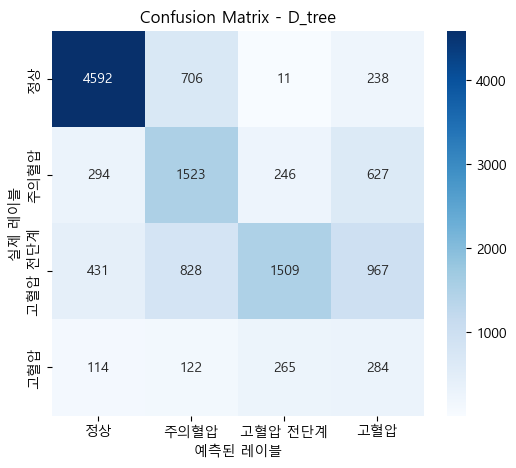


===== üìå RF Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä =====
‚ñ∂ RF ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò (Í∞Å Fold): ['66.48%', '67.00%', '66.52%', '66.64%', '66.58%']
‚ñ∂ RF ÌèâÍ∑† ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò: 66.64%
‚ñ∂ RF ÌÖåÏä§Ìä∏ F1 Ï†êÏàò: 67.39%
‚ñ∂ RF ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 66.14%

--- RF Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú ---
              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.89      0.81      0.85      5547
        Ï£ºÏùòÌòàÏïï       0.51      0.69      0.59      2690
     Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ       0.71      0.46      0.56      3735
         Í≥†ÌòàÏïï       0.23      0.49      0.32       785

    accuracy                           0.66     12757
   macro avg       0.59      0.61      0.58     12757
weighted avg       0.72      0.66      0.67     12757


--- RF ÌòºÎèô ÌñâÎ†¨ ---


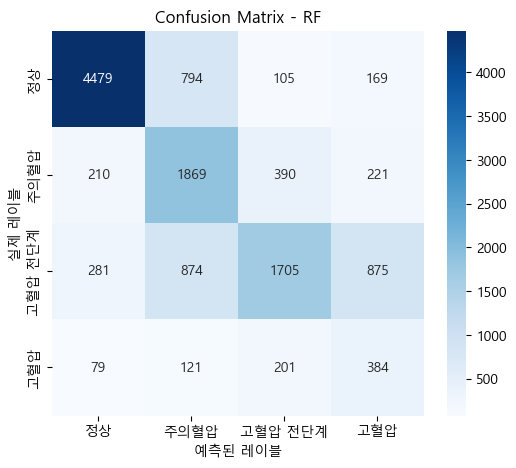


===== üìå HistGB Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä =====
‚ñ∂ HistGB ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò (Í∞Å Fold): ['70.96%', '71.73%', '70.87%', '71.79%', '71.68%']
‚ñ∂ HistGB ÌèâÍ∑† ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò: 71.41%
‚ñ∂ HistGB ÌÖåÏä§Ìä∏ F1 Ï†êÏàò: 71.76%
‚ñ∂ HistGB ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 72.85%

--- HistGB Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú ---
              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.84      0.89      0.86      5547
        Ï£ºÏùòÌòàÏïï       0.59      0.56      0.58      2690
     Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ       0.67      0.72      0.69      3735
         Í≥†ÌòàÏïï       0.55      0.19      0.28       785

    accuracy                           0.73     12757
   macro avg       0.66      0.59      0.60     12757
weighted avg       0.72      0.73      0.72     12757


--- HistGB ÌòºÎèô ÌñâÎ†¨ ---


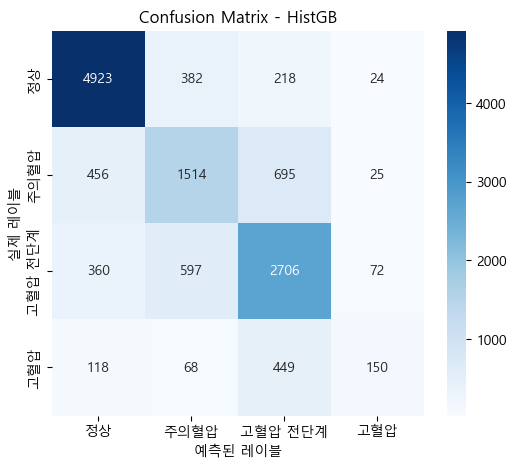


===== üìå XGB Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä =====
‚ñ∂ XGB ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò (Í∞Å Fold): ['70.86%', '71.60%', '71.21%', '71.54%', '71.58%']
‚ñ∂ XGB ÌèâÍ∑† ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò: 71.36%
‚ñ∂ XGB ÌÖåÏä§Ìä∏ F1 Ï†êÏàò: 71.96%
‚ñ∂ XGB ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 72.95%

--- XGB Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú ---
              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.84      0.89      0.86      5547
        Ï£ºÏùòÌòàÏïï       0.59      0.56      0.58      2690
     Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ       0.67      0.72      0.69      3735
         Í≥†ÌòàÏïï       0.59      0.22      0.32       785

    accuracy                           0.73     12757
   macro avg       0.67      0.60      0.61     12757
weighted avg       0.72      0.73      0.72     12757


--- XGB ÌòºÎèô ÌñâÎ†¨ ---


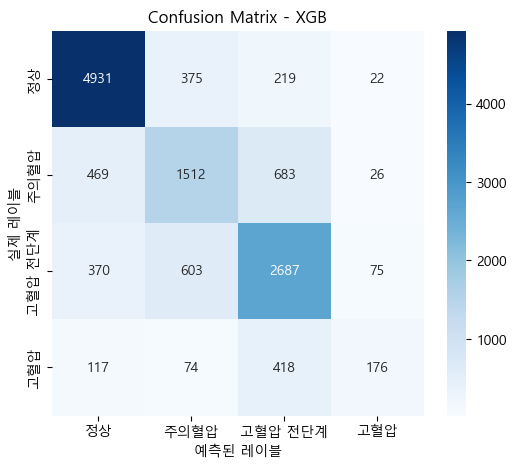


===== üìå LGBM Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä =====
‚ñ∂ LGBM ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò (Í∞Å Fold): ['70.78%', '71.25%', '71.68%', '70.43%', '71.36%']
‚ñ∂ LGBM ÌèâÍ∑† ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò: 71.10%
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4067
[LightGBM] [Info] Number of data points in the train set: 51025, number of used features: 17
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
‚ñ∂ LGBM ÌÖåÏä§Ìä∏ F1 Ï†êÏàò: 71.31%
‚ñ∂ LGBM ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 70.32%

--- LGBM Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú ---
              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.89      0.82      0.85      5547
        Ï£ºÏùòÌòàÏïï       0.55      0.69      0.61      2690
     Í≥†ÌòàÏïï Ï†ÑÎã®Í≥

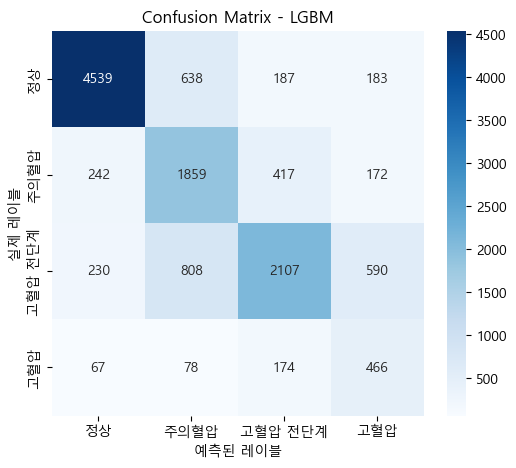


===== üìå LogReg Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä =====
‚ñ∂ LogReg ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò (Í∞Å Fold): ['64.53%', '64.64%', '64.55%', '64.37%', '64.02%']
‚ñ∂ LogReg ÌèâÍ∑† ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò: 64.42%
‚ñ∂ LogReg ÌÖåÏä§Ìä∏ F1 Ï†êÏàò: 64.22%
‚ñ∂ LogReg ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 62.59%

--- LogReg Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú ---
              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.87      0.81      0.84      5547
        Ï£ºÏùòÌòàÏïï       0.48      0.55      0.51      2690
     Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ       0.68      0.41      0.51      3735
         Í≥†ÌòàÏïï       0.21      0.59      0.31       785

    accuracy                           0.63     12757
   macro avg       0.56      0.59      0.54     12757
weighted avg       0.69      0.63      0.64     12757


--- LogReg ÌòºÎèô ÌñâÎ†¨ ---


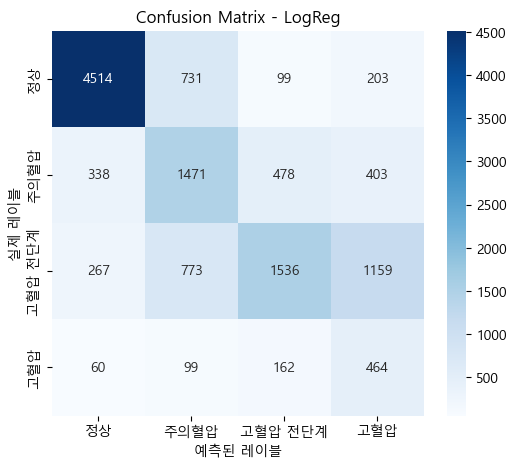

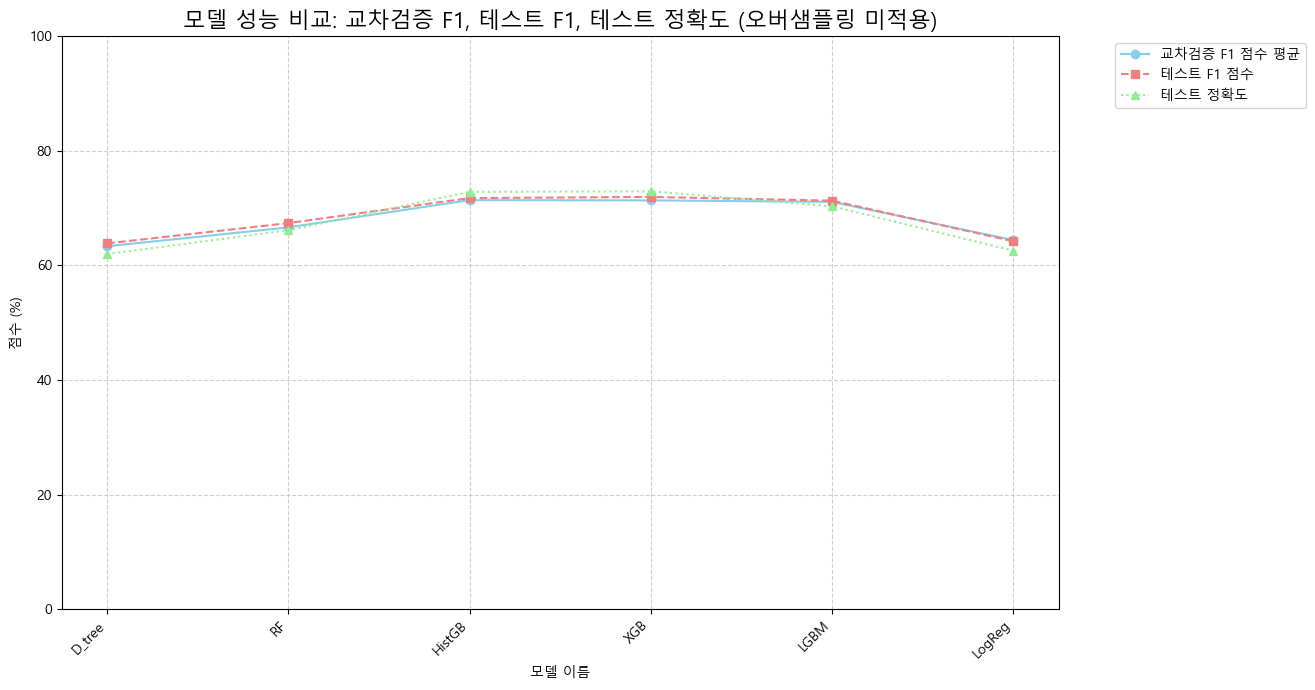

In [27]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns # ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Ï∂îÍ∞Ä


# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
features= ['HE_alt','HE_ast','HE_Upro','HE_crea','HE_TG','HE_HDL_st2','HE_wt','HE_ht','age','HE_sbp1', 'HE_dbp1',
            'HE_wc', 'HE_glu', 'HE_BMI', 'HE_chol', 'HE_LDL_drct', 'HE_HbA1c']
X = data[features]
y = data['HE_HP'].astype(int) - 1

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Î∂ÑÎ•òÍ∏∞ Ï†ïÏùò
classifiers = [
    ('D_tree', DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=0, class_weight='balanced')),
    ('RF', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0, class_weight='balanced')),
    ('HistGB', HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=0)),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)),
    ('LGBM', LGBMClassifier(random_state=0, class_weight='balanced')),
    ('LogReg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0))
]

classifier_names = [name for name, _ in classifiers]

# Í≤∞Í≥º Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
modelaccuracies = [] # cross_val_scoreÏùò Î™®Îì† fold Ï†ïÌôïÎèÑ
modelmeans = []      # cross_val_scoreÏùò ÌèâÍ∑† F1 score (CV)
modelnames = []      # Î™®Îç∏ Ïù¥Î¶Ñ
modeltest_f1 = []    # ÌÖåÏä§Ìä∏ F1 score
modeltest_acc = []   # ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ

# ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ Ï†ïÏùò (yÏùò Í∞íÏù¥ 0, 1, 2 Ïù¥ÎØÄÎ°ú)
class_labels = ['Ï†ïÏÉÅ', 'Ï£ºÏùòÌòàÏïï', 'Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ', 'Í≥†ÌòàÏïï']

# Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä
for classifier_name, classifier in classifiers:
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # ÍµêÏ∞® Í≤ÄÏ¶ùÏùÄ Ïä§ÏºÄÏùºÎßÅÎêú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞(SMOTE ÎØ∏Ï†ÅÏö©)Î°ú ÏàòÌñâ
    accuracies = cross_val_score(classifier, X_train_scaled, y_train, cv=skf, scoring='f1_weighted', n_jobs=-1)

    print(f"\n===== üìå {classifier_name} Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä =====")
    print(f"‚ñ∂ {classifier_name} ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò (Í∞Å Fold): {[f'{score*100:.2f}%' for score in accuracies]}")
    print(f"‚ñ∂ {classifier_name} ÌèâÍ∑† ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò: {accuracies.mean()*100:.2f}%")

    modelaccuracies.append(accuracies) # Í∞Å FoldÏùò Ï†ïÌôïÎèÑ Î¶¨Ïä§Ìä∏
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100) # ÌèâÍ∑† F1 Ï†êÏàò Ï†ÄÏû• (Î∞±Î∂ÑÏú®)

    # ÏµúÏ¢Ö Î™®Îç∏ ÌõàÎ†®ÏùÄ SMOTE ÎØ∏Ï†ÅÏö©Îêú Ïä§ÏºÄÏùºÎßÅÎêú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î°ú ÏßÑÌñâ
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled) # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îäî Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©

    test_f1 = f1_score(y_test, y_pred, average='weighted')
    test_acc = accuracy_score(y_test, y_pred)
    modeltest_f1.append(test_f1*100) # Î∞±Î∂ÑÏú®Î°ú Ï†ÄÏû•
    modeltest_acc.append(test_acc*100) # Î∞±Î∂ÑÏú®Î°ú Ï†ÄÏû•

    print(f"‚ñ∂ {classifier_name} ÌÖåÏä§Ìä∏ F1 Ï†êÏàò: {test_f1*100:.2f}%")
    print(f"‚ñ∂ {classifier_name} ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: {test_acc*100:.2f}%")

    # Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú Ï∂úÎ†•
    print(f"\n--- {classifier_name} Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú ---")
    print(classification_report(y_test, y_pred, target_names=class_labels))

    # ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
    print(f"\n--- {classifier_name} ÌòºÎèô ÌñâÎ†¨ ---")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.xlabel('ÏòàÏ∏°Îêú Î†àÏù¥Î∏î')
    plt.ylabel('Ïã§Ï†ú Î†àÏù¥Î∏î')
    plt.show()



plt.figure(figsize=(14, 7))
plt.plot(modelnames, modelmeans, marker='o', linestyle='-', color='skyblue', label='ÍµêÏ∞®Í≤ÄÏ¶ù F1 Ï†êÏàò ÌèâÍ∑†')
plt.plot(modelnames, modeltest_f1, marker='s', linestyle='--', color='lightcoral', label='ÌÖåÏä§Ìä∏ F1 Ï†êÏàò')
plt.plot(modelnames, modeltest_acc, marker='^', linestyle=':', color='lightgreen', label='ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ')

plt.ylim([0, 100]) # Ï†êÏàò Î≤îÏúÑÎ•º 0-100ÏúºÎ°ú ÏÑ§Ï†ï
plt.ylabel('Ï†êÏàò (%)')
plt.title('Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê: ÍµêÏ∞®Í≤ÄÏ¶ù F1, ÌÖåÏä§Ìä∏ F1, ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ (Ïò§Î≤ÑÏÉòÌîåÎßÅ ÎØ∏Ï†ÅÏö©)', fontsize=16)
plt.xlabel('Î™®Îç∏ Ïù¥Î¶Ñ')
plt.xticks(rotation=45, ha='right') # Î™®Îç∏ Ïù¥Î¶Ñ ÌöåÏ†Ñ Î∞è Ï†ïÎ†¨
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Î≤îÎ°ÄÎ•º Í∑∏ÎûòÌîÑ Î∞ñÏóê
plt.tight_layout(rect=[0, 0, 0.95, 1]) # Î≤îÎ°Ä Í≥µÍ∞Ñ ÌôïÎ≥¥
plt.show()

In [28]:
data = pd.read_csv("ÏµúÏ¢Ö_Í±¥Í∞ïÍ≤ÄÏßÑ_Îç∞Ïù¥ÌÑ∞ÏÖã(Í∞ÄÍ≥µÎêú).csv")


===== üìå D_tree Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä =====
‚ñ∂ D_tree ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò (Í∞Å Fold): ['66.05%', '66.96%', '66.24%', '66.82%', '67.64%']
‚ñ∂ D_tree ÌèâÍ∑† ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò: 66.74%
‚ñ∂ D_tree ÌÖåÏä§Ìä∏ F1 Ï†êÏàò: 68.44%
‚ñ∂ D_tree ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 67.99%

--- D_tree Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú ---
              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.90      0.76      0.82      1163
        Ï£ºÏùòÌòàÏïï       0.66      0.74      0.70       635
     Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ       0.62      0.68      0.65       931
         Í≥†ÌòàÏïï       0.50      0.51      0.50       723

    accuracy                           0.68      3452
   macro avg       0.67      0.67      0.67      3452
weighted avg       0.69      0.68      0.68      3452


--- D_tree ÌòºÎèô ÌñâÎ†¨ ---


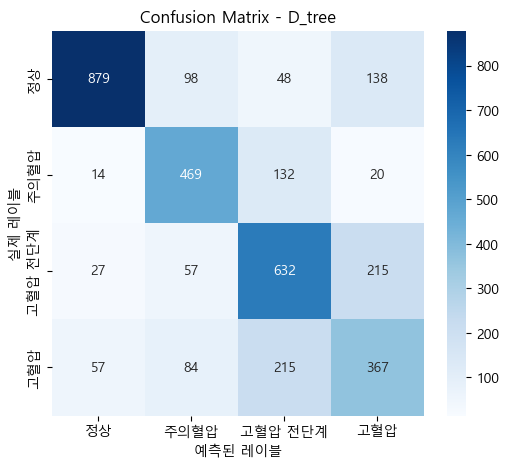


===== üìå RF Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä =====
‚ñ∂ RF ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò (Í∞Å Fold): ['68.45%', '70.04%', '69.27%', '69.09%', '70.32%']
‚ñ∂ RF ÌèâÍ∑† ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò: 69.44%
‚ñ∂ RF ÌÖåÏä§Ìä∏ F1 Ï†êÏàò: 70.33%
‚ñ∂ RF ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 70.57%

--- RF Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú ---
              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.85      0.86      0.86      1163
        Ï£ºÏùòÌòàÏïï       0.58      0.78      0.66       635
     Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ       0.67      0.62      0.64       931
         Í≥†ÌòàÏïï       0.65      0.51      0.57       723

    accuracy                           0.71      3452
   macro avg       0.69      0.69      0.68      3452
weighted avg       0.71      0.71      0.70      3452


--- RF ÌòºÎèô ÌñâÎ†¨ ---


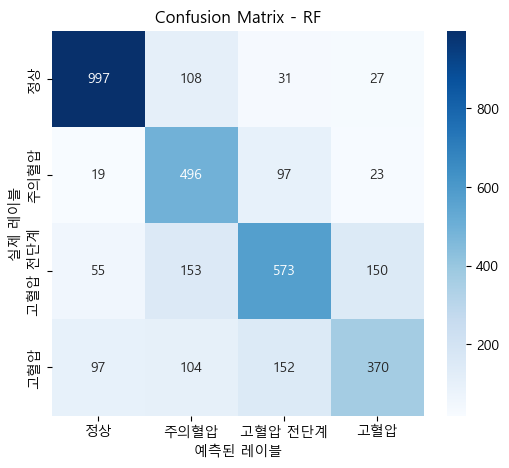


===== üìå HistGB Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä =====
‚ñ∂ HistGB ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò (Í∞Å Fold): ['72.29%', '72.92%', '72.94%', '72.09%', '74.30%']
‚ñ∂ HistGB ÌèâÍ∑† ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò: 72.91%
‚ñ∂ HistGB ÌÖåÏä§Ìä∏ F1 Ï†êÏàò: 74.84%
‚ñ∂ HistGB ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 74.97%

--- HistGB Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú ---
              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.86      0.86      0.86      1163
        Ï£ºÏùòÌòàÏïï       0.71      0.71      0.71       635
     Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ       0.69      0.76      0.72       931
         Í≥†ÌòàÏïï       0.68      0.59      0.63       723

    accuracy                           0.75      3452
   macro avg       0.74      0.73      0.73      3452
weighted avg       0.75      0.75      0.75      3452


--- HistGB ÌòºÎèô ÌñâÎ†¨ ---


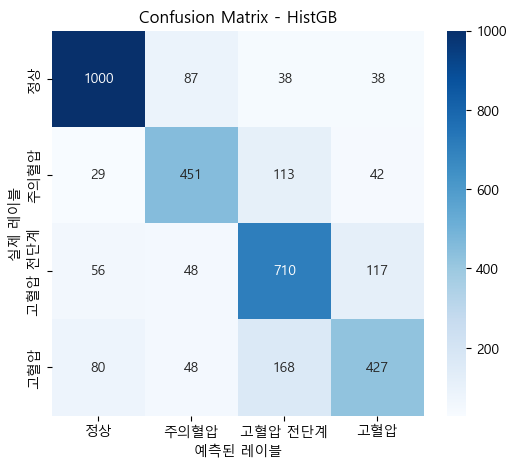


===== üìå XGB Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä =====
‚ñ∂ XGB ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò (Í∞Å Fold): ['72.07%', '71.75%', '73.08%', '71.58%', '72.55%']
‚ñ∂ XGB ÌèâÍ∑† ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò: 72.21%
‚ñ∂ XGB ÌÖåÏä§Ìä∏ F1 Ï†êÏàò: 74.56%
‚ñ∂ XGB ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 74.71%

--- XGB Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú ---
              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.85      0.86      0.86      1163
        Ï£ºÏùòÌòàÏïï       0.71      0.70      0.70       635
     Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ       0.70      0.75      0.72       931
         Í≥†ÌòàÏïï       0.67      0.60      0.64       723

    accuracy                           0.75      3452
   macro avg       0.73      0.73      0.73      3452
weighted avg       0.75      0.75      0.75      3452


--- XGB ÌòºÎèô ÌñâÎ†¨ ---


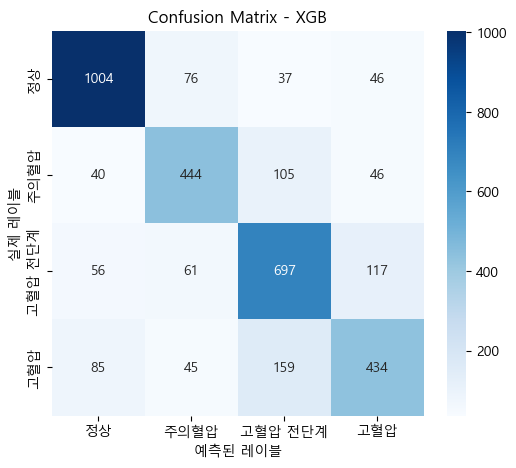


===== üìå LGBM Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä =====
‚ñ∂ LGBM ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò (Í∞Å Fold): ['72.40%', '72.07%', '72.79%', '72.08%', '73.68%']
‚ñ∂ LGBM ÌèâÍ∑† ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò: 72.60%
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2990
[LightGBM] [Info] Number of data points in the train set: 13807, number of used features: 17
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
‚ñ∂ LGBM ÌÖåÏä§Ìä∏ F1 Ï†êÏàò: 74.30%
‚ñ∂ LGBM ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 74.22%

--- LGBM Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú ---
              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.87      0.83      0.85      1163
        Ï£ºÏùòÌòàÏïï       0.67      0.74      0.71       635
     Í≥†ÌòàÏïï Ï†ÑÎã®Í≥

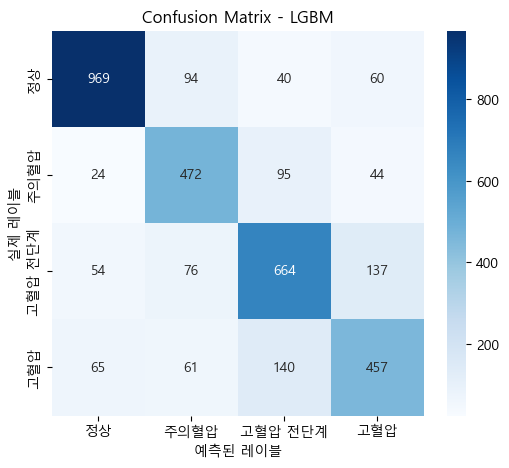


===== üìå LogReg Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä =====
‚ñ∂ LogReg ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò (Í∞Å Fold): ['62.98%', '63.57%', '61.32%', '61.98%', '61.93%']
‚ñ∂ LogReg ÌèâÍ∑† ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò: 62.36%
‚ñ∂ LogReg ÌÖåÏä§Ìä∏ F1 Ï†êÏàò: 63.26%
‚ñ∂ LogReg ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 63.27%

--- LogReg Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú ---
              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.85      0.82      0.83      1163
        Ï£ºÏùòÌòàÏïï       0.51      0.63      0.56       635
     Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ       0.60      0.43      0.50       931
         Í≥†ÌòàÏïï       0.49      0.61      0.54       723

    accuracy                           0.63      3452
   macro avg       0.61      0.62      0.61      3452
weighted avg       0.65      0.63      0.63      3452


--- LogReg ÌòºÎèô ÌñâÎ†¨ ---


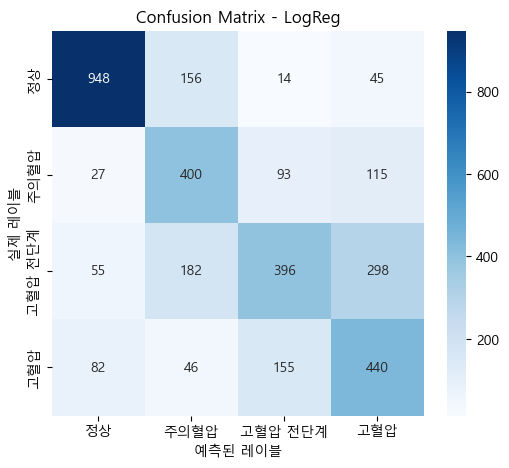

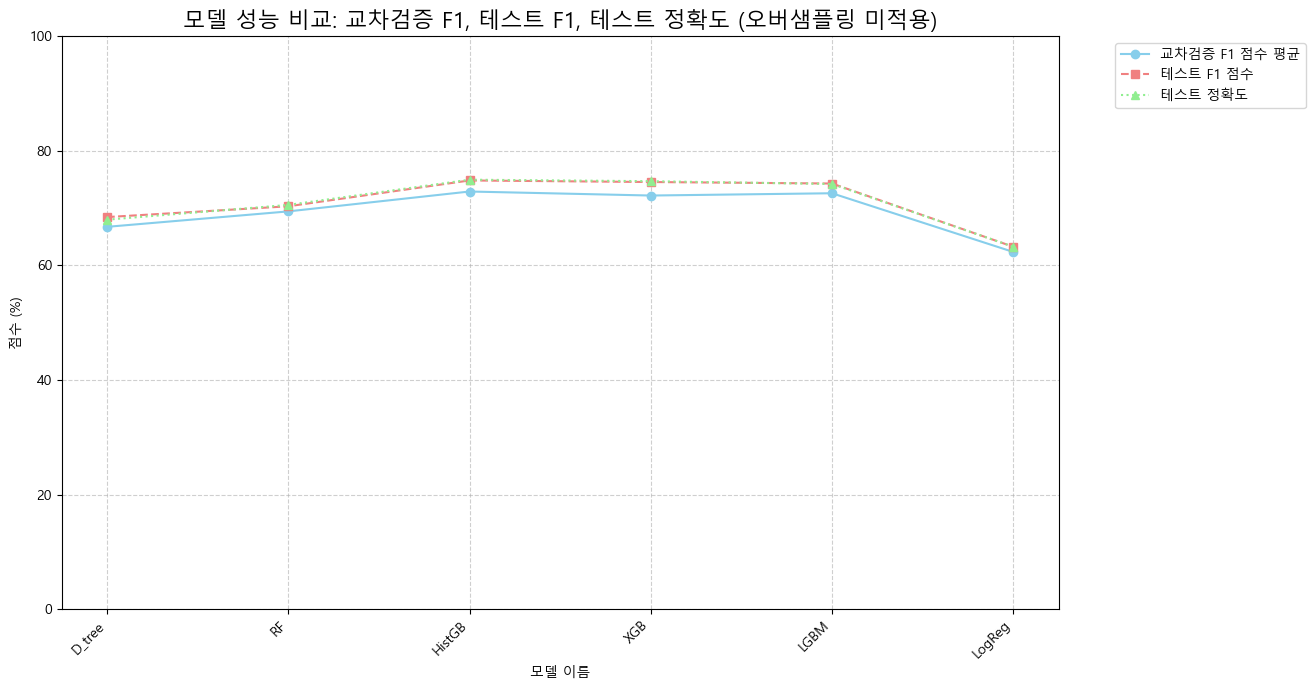

In [30]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns # ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Ï∂îÍ∞Ä


# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
features= ['HE_alt','HE_ast','HE_Upro','HE_crea','HE_TG','HE_HDL_st2','HE_wt','HE_ht','age','HE_sbp1', 'HE_dbp1',
            'HE_wc', 'HE_glu', 'HE_BMI', 'HE_chol', 'HE_LDL_drct', 'HE_HbA1c']
X = data[features]
y = data['HE_HP'].astype(int) - 1

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Î∂ÑÎ•òÍ∏∞ Ï†ïÏùò
classifiers = [
    ('D_tree', DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=42, class_weight='balanced')),
    ('RF', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0, class_weight='balanced')),
    ('HistGB', HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('LGBM', LGBMClassifier(random_state=0, class_weight='balanced')),
    ('LogReg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
]

classifier_names = [name for name, _ in classifiers]

# Í≤∞Í≥º Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
modelaccuracies = [] # cross_val_scoreÏùò Î™®Îì† fold Ï†ïÌôïÎèÑ
modelmeans = []      # cross_val_scoreÏùò ÌèâÍ∑† F1 score (CV)
modelnames = []      # Î™®Îç∏ Ïù¥Î¶Ñ
modeltest_f1 = []    # ÌÖåÏä§Ìä∏ F1 score
modeltest_acc = []   # ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ

# ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ Ï†ïÏùò (yÏùò Í∞íÏù¥ 0, 1, 2 Ïù¥ÎØÄÎ°ú)
class_labels = ['Ï†ïÏÉÅ', 'Ï£ºÏùòÌòàÏïï', 'Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ', 'Í≥†ÌòàÏïï']

# Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä
for classifier_name, classifier in classifiers:
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # ÍµêÏ∞® Í≤ÄÏ¶ùÏùÄ Ïä§ÏºÄÏùºÎßÅÎêú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞(SMOTE ÎØ∏Ï†ÅÏö©)Î°ú ÏàòÌñâ
    accuracies = cross_val_score(classifier, X_train_scaled, y_train, cv=skf, scoring='f1_weighted', n_jobs=-1)

    print(f"\n===== üìå {classifier_name} Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä =====")
    print(f"‚ñ∂ {classifier_name} ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò (Í∞Å Fold): {[f'{score*100:.2f}%' for score in accuracies]}")
    print(f"‚ñ∂ {classifier_name} ÌèâÍ∑† ÍµêÏ∞® Í≤ÄÏ¶ù F1 Ï†êÏàò: {accuracies.mean()*100:.2f}%")

    modelaccuracies.append(accuracies) # Í∞Å FoldÏùò Ï†ïÌôïÎèÑ Î¶¨Ïä§Ìä∏
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100) # ÌèâÍ∑† F1 Ï†êÏàò Ï†ÄÏû• (Î∞±Î∂ÑÏú®)

    # ÏµúÏ¢Ö Î™®Îç∏ ÌõàÎ†®ÏùÄ SMOTE ÎØ∏Ï†ÅÏö©Îêú Ïä§ÏºÄÏùºÎßÅÎêú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î°ú ÏßÑÌñâ
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled) # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îäî Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©

    test_f1 = f1_score(y_test, y_pred, average='weighted')
    test_acc = accuracy_score(y_test, y_pred)
    modeltest_f1.append(test_f1*100) # Î∞±Î∂ÑÏú®Î°ú Ï†ÄÏû•
    modeltest_acc.append(test_acc*100) # Î∞±Î∂ÑÏú®Î°ú Ï†ÄÏû•

    print(f"‚ñ∂ {classifier_name} ÌÖåÏä§Ìä∏ F1 Ï†êÏàò: {test_f1*100:.2f}%")
    print(f"‚ñ∂ {classifier_name} ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: {test_acc*100:.2f}%")

    # Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú Ï∂úÎ†•
    print(f"\n--- {classifier_name} Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú ---")
    print(classification_report(y_test, y_pred, target_names=class_labels))

    # ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
    print(f"\n--- {classifier_name} ÌòºÎèô ÌñâÎ†¨ ---")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.xlabel('ÏòàÏ∏°Îêú Î†àÏù¥Î∏î')
    plt.ylabel('Ïã§Ï†ú Î†àÏù¥Î∏î')
    plt.show()



plt.figure(figsize=(14, 7))
plt.plot(modelnames, modelmeans, marker='o', linestyle='-', color='skyblue', label='ÍµêÏ∞®Í≤ÄÏ¶ù F1 Ï†êÏàò ÌèâÍ∑†')
plt.plot(modelnames, modeltest_f1, marker='s', linestyle='--', color='lightcoral', label='ÌÖåÏä§Ìä∏ F1 Ï†êÏàò')
plt.plot(modelnames, modeltest_acc, marker='^', linestyle=':', color='lightgreen', label='ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ')

plt.ylim([0, 100]) # Ï†êÏàò Î≤îÏúÑÎ•º 0-100ÏúºÎ°ú ÏÑ§Ï†ï
plt.ylabel('Ï†êÏàò (%)')
plt.title('Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê: ÍµêÏ∞®Í≤ÄÏ¶ù F1, ÌÖåÏä§Ìä∏ F1, ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ (Ïò§Î≤ÑÏÉòÌîåÎßÅ ÎØ∏Ï†ÅÏö©)', fontsize=16)
plt.xlabel('Î™®Îç∏ Ïù¥Î¶Ñ')
plt.xticks(rotation=45, ha='right') # Î™®Îç∏ Ïù¥Î¶Ñ ÌöåÏ†Ñ Î∞è Ï†ïÎ†¨
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Î≤îÎ°ÄÎ•º Í∑∏ÎûòÌîÑ Î∞ñÏóê
plt.tight_layout(rect=[0, 0, 0.95, 1]) # Î≤îÎ°Ä Í≥µÍ∞Ñ ÌôïÎ≥¥
plt.show()

**Î™®Îç∏ ÏÑ†Ï†ï Î∞è ÌèâÍ∞Ä**

--- HistGradientBoostingClassifier with balanced sample_weight Performance ---
              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.88      0.85      0.86      1159
       Ï£ºÏùò ÌòàÏïï       0.68      0.72      0.70       635
     Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ       0.70      0.71      0.70       929
         Í≥†ÌòàÏïï       0.64      0.62      0.63       721

    accuracy                           0.74      3444
   macro avg       0.72      0.72      0.72      3444
weighted avg       0.74      0.74      0.74      3444



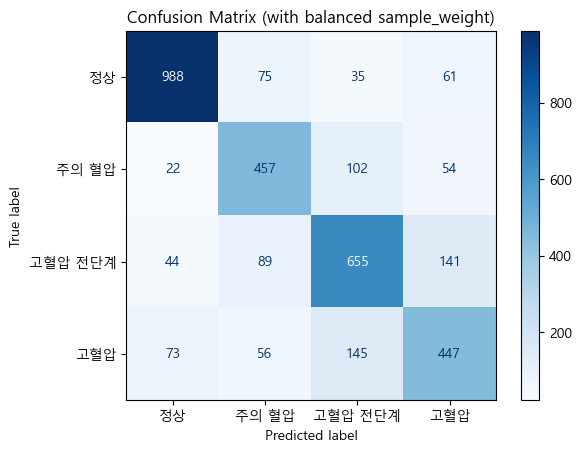


Overall Metrics:
Accuracy: 0.7395
Macro F1-score: 0.7227
Weighted F1-score: 0.7401


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_sample_weight # sample_weight Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÌïÑÏöîÏãú Ï£ºÏÑù Ìï¥Ï†ú Î∞è Í≤ΩÎ°ú ÏàòÏ†ï)
# plt.rcParams['font.family'] = 'Malgun Gothic' # Windows ÏÇ¨Ïö©Ïûê
# plt.rcParams['axes.unicode_minus'] = False # ÎßàÏù¥ÎÑàÏä§ Ìè∞Ìä∏ Íπ®Ïßê Î∞©ÏßÄ
# font_path = 'C:/Windows/Fonts/malgun.ttf' # Ïã§Ï†ú Ìè∞Ìä∏ Í≤ΩÎ°úÎ°ú Î≥ÄÍ≤Ω
# font_name = fm.FontProperties(fname=font_path, size=12).get_name()
# plt.rc('font', family=font_name)


# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_HP_input_features = ['age','HE_sbp1', 'HE_dbp1', 'HE_TG','HE_BMI',  'HE_LDL_drct', 'HE_HbA1c']

# XÏôÄ y Ï†ïÏùò (0:Ï†ïÏÉÅ, 1:Í≤ΩÍ≥ÑÌòï, 2:ÎãπÎá®)
X = data[HE_HP_input_features]
y = data['HE_HP'].astype(int) - 1
class_names_korean = ['Ï†ïÏÉÅ', 'Ï£ºÏùò ÌòàÏïï', 'Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ', 'Í≥†ÌòàÏïï']

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- SMOTE ÏóÜÏù¥ Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä (ÏõêÎ≥∏ Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞Ïóê sample_weight Ï†ÅÏö©) ---
# ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞ (Î∂àÍ∑†Ìòï Ìï¥ÏÜåÎ•º ÏúÑÌï¥)
# 'balanced' ÏòµÏÖòÏùÄ Í∞Å ÌÅ¥ÎûòÏä§Ïùò ÎπàÎèÑÏóê Î∞òÎπÑÎ°ÄÌïòÏó¨ Í∞ÄÏ§ëÏπòÎ•º ÏûêÎèôÏúºÎ°ú Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
sample_weights_train = compute_sample_weight(class_weight='balanced', y=y_train)

# HistGradientBoostingClassifier Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌõàÎ†®
model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
model.fit(X_train_scaled, y_train, sample_weight=sample_weights_train) # sample_weight Ï†ÅÏö©!

# ÏòàÏ∏° Î∞è ÏÑ±Îä• ÌèâÍ∞Ä
y_pred = model.predict(X_test_scaled)
report = classification_report(y_test, y_pred, target_names=class_names_korean, output_dict=True)

print("--- HistGradientBoostingClassifier with balanced sample_weight Performance ---")
print(classification_report(y_test, y_pred, target_names=class_names_korean))

# ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_korean)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (with balanced sample_weight)')
plt.show()

# Ï†ÑÏ≤¥ Î™®Îç∏Ïùò Ï†ïÌôïÎèÑ(Accuracy), Macro F1, Weighted F1 Ï∂úÎ†• (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
print("\nOverall Metrics:")
print(f"Accuracy: {report['accuracy']:.4f}")
print(f"Macro F1-score: {report['macro avg']['f1-score']:.4f}")
print(f"Weighted F1-score: {report['weighted avg']['f1-score']:.4f}")

Font set to: Malgun Gothic
ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:
HE_HP
0    5796
1    3172
2    4646
3    3605
Name: count, dtype: int64


ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ (Split ÌõÑ) ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:
HE_HP
0    4637
1    2537
2    3717
3    2884
Name: count, dtype: int64


--- 1. Class_Weight 'balanced' Ï†ÅÏö© Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä ---
              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.88      0.85      0.86      1159
       Ï£ºÏùò ÌòàÏïï       0.68      0.72      0.70       635
     Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ       0.70      0.71      0.70       929
         Í≥†ÌòàÏïï       0.64      0.62      0.63       721

    accuracy                           0.74      3444
   macro avg       0.72      0.72      0.72      3444
weighted avg       0.74      0.74      0.74      3444


--- 2. Borderline-SMOTE (ÌÅ¥ÎûòÏä§ 1, 2Îßå Ïò§Î≤ÑÏÉòÌîåÎßÅ) Ï†ÅÏö© ÌõÑ Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä ---
Ïò§Î≤ÑÏÉòÌîåÎßÅ Ï†Ñ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨: {0: 4637, 1: 2537, 2: 3717, 3: 2884}
Ïò§Î≤ÑÏÉòÌîåÎßÅ

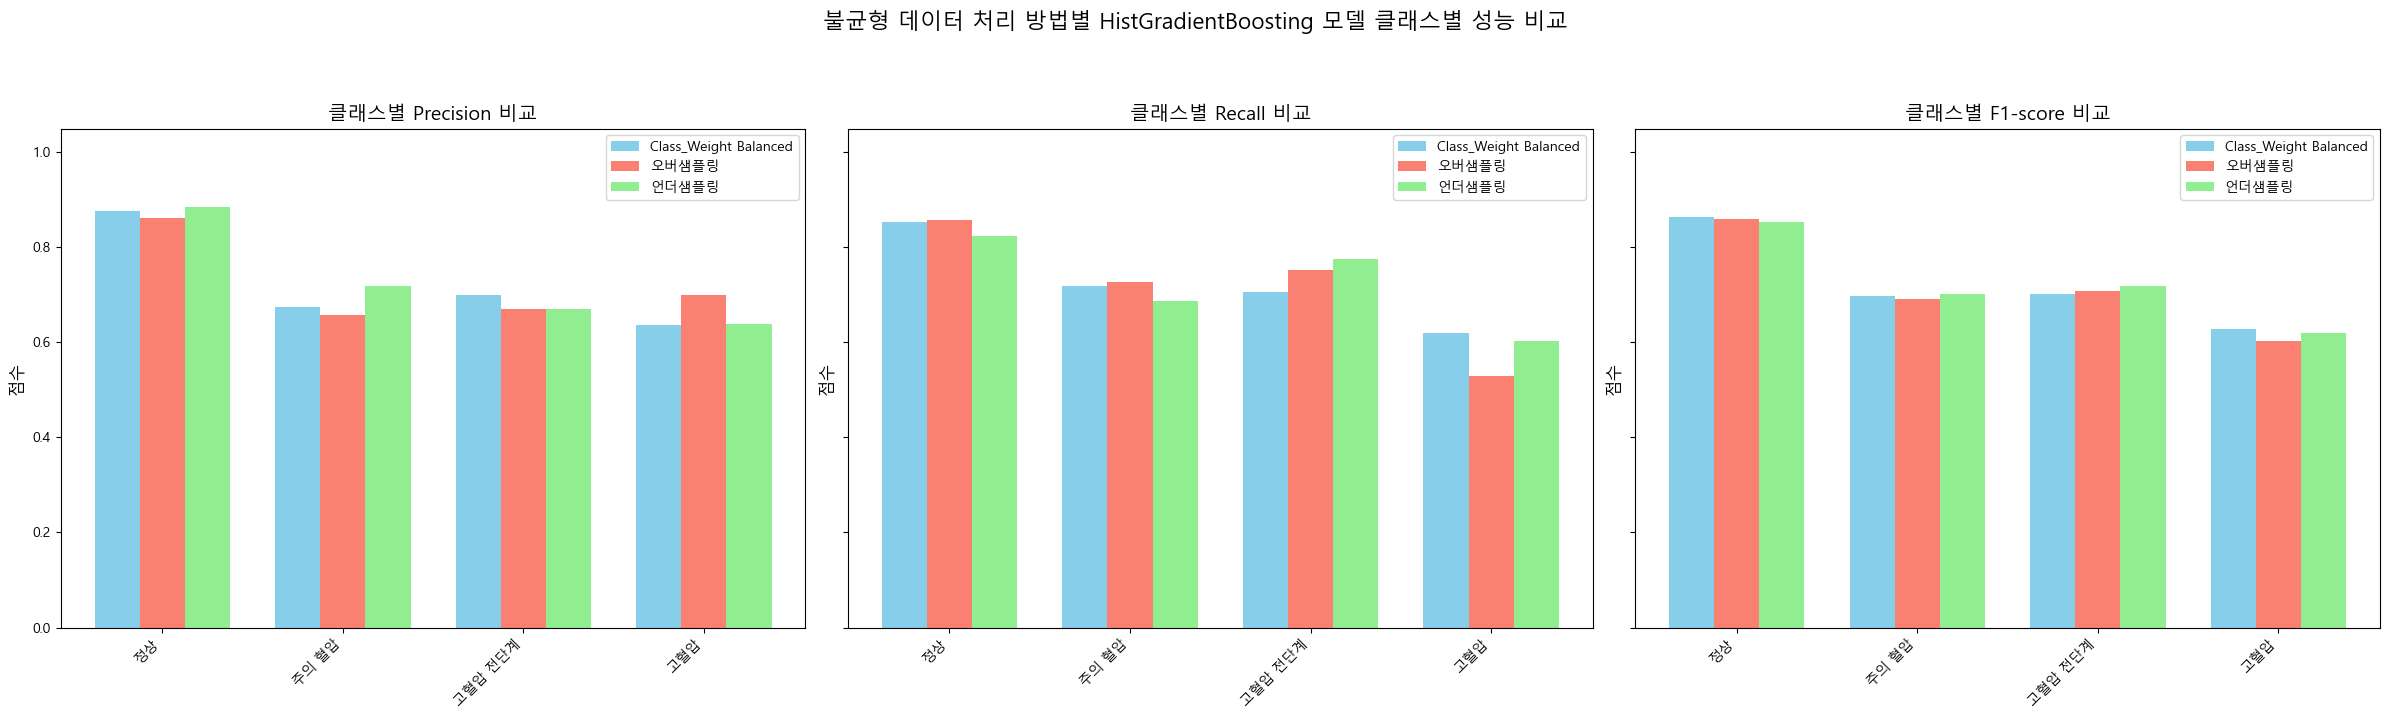

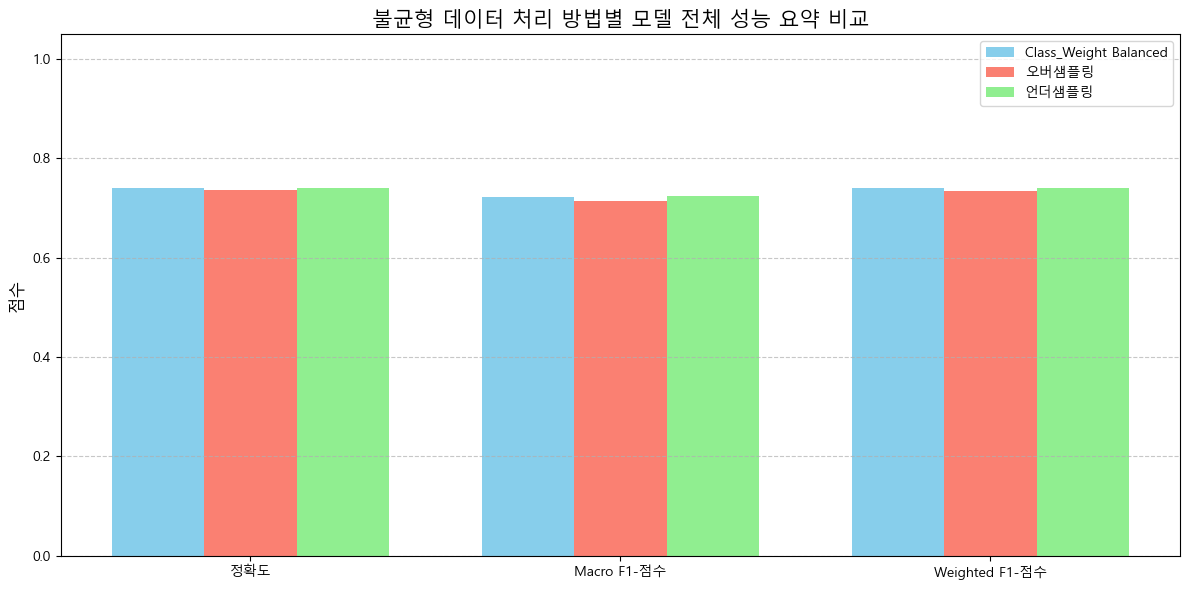

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_sample_weight
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÌïÑÏöîÏãú Ï£ºÏÑù Ìï¥Ï†ú Î∞è Í≤ΩÎ°ú ÏàòÏ†ï)
plt.rcParams['axes.unicode_minus'] = False # ÎßàÏù¥ÎÑàÏä§ Ìè∞Ìä∏ Íπ®Ïßê Î∞©ÏßÄ

font_path = 'C:/Windows/Fonts/malgun.ttf' # Windows ÏÇ¨Ïö©Ïûê
if os.path.exists(font_path):
    font_name = fm.FontProperties(fname=font_path, size=12).get_name()
    plt.rc('font', family=font_name)
    print(f"Font set to: {font_name}")
else:
    print(f"Warning: Font file not found at {font_path}. Using default font.")
    print("If Korean characters appear broken, please install a Korean font or specify the correct path.")





# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_HP_input_features = ['age','HE_sbp1', 'HE_dbp1', 'HE_TG','HE_BMI',  'HE_LDL_drct', 'HE_HbA1c']

# XÏôÄ y Ï†ïÏùò (0:Ï†ïÏÉÅ, 1:Ï£ºÏùò ÌòàÏïï, 2:Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ, 3:Í≥†ÌòàÏïï)
X = data[HE_HP_input_features]
y = data['HE_HP'].astype(int) - 1 # 0Î∂ÄÌÑ∞ ÏãúÏûëÌïòÎèÑÎ°ù Ï°∞Ï†ï
class_names_korean = ['Ï†ïÏÉÅ', 'Ï£ºÏùò ÌòàÏïï', 'Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ', 'Í≥†ÌòàÏïï']

print("ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:")
print(y.value_counts().sort_index())
print("\n")


# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Ïã§Ï†ú ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ ÌôïÏù∏
print("ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ (Split ÌõÑ) ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:")
train_class_counts = y_train.value_counts().sort_index()
print(train_class_counts)
print("\n")

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --- 1. Class_Weight 'balanced' Ï†ÅÏö© Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä ---
print("--- 1. Class_Weight 'balanced' Ï†ÅÏö© Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä ---")
sample_weights_balanced = compute_sample_weight(class_weight='balanced', y=y_train)

model_balanced_weight = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
model_balanced_weight.fit(X_train_scaled, y_train, sample_weight=sample_weights_balanced)
y_pred_balanced_weight = model_balanced_weight.predict(X_test_scaled)
report_balanced_weight = classification_report(y_test, y_pred_balanced_weight, target_names=class_names_korean, output_dict=True)
print(classification_report(y_test, y_pred_balanced_weight, target_names=class_names_korean))


# --- 2. ÌäπÏ†ï ÌÅ¥ÎûòÏä§Îßå Ïò§Î≤ÑÏÉòÌîåÎßÅ (Borderline-SMOTE) Ï†ÅÏö© ÌõÑ Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä ---
print("\n--- 2. Borderline-SMOTE (ÌÅ¥ÎûòÏä§ 1, 2Îßå Ïò§Î≤ÑÏÉòÌîåÎßÅ) Ï†ÅÏö© ÌõÑ Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä ---")

# Ïò§Î≤ÑÏÉòÌîåÎßÅ Ï†Ñ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨
print("Ïò§Î≤ÑÏÉòÌîåÎßÅ Ï†Ñ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:", train_class_counts.to_dict())

# Ïó¨Í∏∞ÏÑúÎäî 'Ï†ïÏÉÅ' (ÌÅ¥ÎûòÏä§ 0)Ïùò ÏÉòÌîå ÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ïò§Î≤ÑÏÉòÌîåÎßÅÌïòÏó¨
# 'Ï£ºÏùò ÌòàÏïï'(ÌÅ¥ÎûòÏä§ 1)Í≥º 'Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ'(ÌÅ¥ÎûòÏä§ 2)Ïùò ÏàòÎ•º ÎäòÎ¶ΩÎãàÎã§.
# Ïù¥Îäî Borderline-SMOTEÏùò ÏöîÍµ¨ÏÇ¨Ìï≠ (Î™©Ìëú ÏÉòÌîå ÏàòÍ∞Ä ÌòÑÏû¨ ÏÉòÌîå ÏàòÎ≥¥Îã§ Ïª§Ïïº Ìï®)ÏùÑ ÎßåÏ°±ÏãúÌÇµÎãàÎã§.
target_count_for_oversampling_smote = train_class_counts[0] # Í∞ÄÏû• ÎßéÏùÄ 'Ï†ïÏÉÅ' ÌÅ¥ÎûòÏä§ Ïàò

# Ïò§Î≤ÑÏÉòÌîåÎßÅ Ï†ÑÎûµ Ï†ïÏùò: {ÌÅ¥ÎûòÏä§ ÎùºÎ≤®: Î™©Ìëú ÏÉòÌîå Ïàò}
# Ïò§Î≤ÑÏÉòÌîåÎßÅÌï† ÌÅ¥ÎûòÏä§ (ÌÅ¥ÎûòÏä§ 1, 2)Îßå ÎîïÏÖîÎÑàÎ¶¨Ïóê Ìè¨Ìï®
# ÌÅ¥ÎûòÏä§ 0(Ï†ïÏÉÅ)Í≥º ÌÅ¥ÎûòÏä§ 3(Í≥†ÌòàÏïï)ÏùÄ ÎîïÏÖîÎÑàÎ¶¨Ïóê Ìè¨Ìï®ÌïòÏßÄ ÏïäÏïÑ ÏÉòÌîå ÏàòÍ∞Ä Î≥ÄÍ≤ΩÎêòÏßÄ ÏïäÏäµÎãàÎã§.
sampling_strategy_over = {
    1: target_count_for_oversampling_smote, # Ï£ºÏùò ÌòàÏïïÏùÑ 'Ï†ïÏÉÅ'Í≥º ÎèôÏùºÌïòÍ≤å (ÎòêÎäî Í∑∏ Ïù¥ÏÉÅ)
    2: target_count_for_oversampling_smote  # Í≥†ÌòàÏïï Ï†ÑÎã®Í≥ÑÎ•º 'Ï†ïÏÉÅ'Í≥º ÎèôÏùºÌïòÍ≤å (ÎòêÎäî Í∑∏ Ïù¥ÏÉÅ)
}

print(f"Ïò§Î≤ÑÏÉòÌîåÎßÅ Î™©Ìëú Ï†ÑÎûµ: {sampling_strategy_over}")

smote_custom = BorderlineSMOTE(random_state=42, kind='borderline-1', sampling_strategy=sampling_strategy_over)
X_train_smote_custom, y_train_smote_custom = smote_custom.fit_resample(X_train_scaled, y_train)

print("Ïò§Î≤ÑÏÉòÌîåÎßÅ ÌõÑ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:")
print(pd.Series(y_train_smote_custom).value_counts().sort_index())

model_after_smote_custom = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
model_after_smote_custom.fit(X_train_smote_custom, y_train_smote_custom)
y_pred_after_smote_custom = model_after_smote_custom.predict(X_test_scaled)
report_after_smote_custom = classification_report(y_test, y_pred_after_smote_custom, target_names=class_names_korean, output_dict=True)
print(classification_report(y_test, y_pred_after_smote_custom, target_names=class_names_korean))


# --- 3. ÌäπÏ†ï ÌÅ¥ÎûòÏä§Îßå Ïñ∏ÎçîÏÉòÌîåÎßÅ (RandomUnderSampler) Ï†ÅÏö© ÌõÑ Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä ---
print("\n--- 3. RandomUnderSampler (ÌÅ¥ÎûòÏä§ 0Îßå Ïñ∏ÎçîÏÉòÌîåÎßÅ) Ï†ÅÏö© ÌõÑ Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä ---")

# Ïñ∏ÎçîÏÉòÌîåÎßÅ Ï†Ñ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨
print("Ïñ∏ÎçîÏÉòÌîåÎßÅ Ï†Ñ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:", train_class_counts.to_dict())

# 'Í≥†ÌòàÏïï' (ÌÅ¥ÎûòÏä§ 3)Ïùò ÏÉòÌîå ÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú 'Ï†ïÏÉÅ' (ÌÅ¥ÎûòÏä§ 0)ÏùÑ Ïñ∏ÎçîÏÉòÌîåÎßÅ
target_count_for_undersampling = train_class_counts[3]

# Ïñ∏ÎçîÏÉòÌîåÎßÅ Ï†ÑÎûµ Ï†ïÏùò: {ÌÅ¥ÎûòÏä§ ÎùºÎ≤®: Î™©Ìëú ÏÉòÌîå Ïàò}
# Ïñ∏ÎçîÏÉòÌîåÎßÅÌï† ÌÅ¥ÎûòÏä§ (ÌÅ¥ÎûòÏä§ 0)Îßå ÎîïÏÖîÎÑàÎ¶¨Ïóê Ìè¨Ìï®ÌïòÍ≥†, Î™©Ìëú ÏÉòÌîå ÏàòÎ•º ÏßÄÏ†ï.
# ÎÇòÎ®∏ÏßÄ ÌÅ¥ÎûòÏä§(1, 2, 3)Îäî RandomUnderSamplerÏóê ÏùòÌï¥ ÏÉòÌîå ÏàòÍ∞Ä Î≥ÄÍ≤ΩÎêòÏßÄ ÏïäÏäµÎãàÎã§.
sampling_strategy_under = {
    0: target_count_for_undersampling # Ï†ïÏÉÅÏùÑ Í≥†ÌòàÏïïÍ≥º ÎèôÏùºÌïòÍ≤å (ÎòêÎäî Í∑∏ Ïù¥Ìïò)
}
print(f"Ïñ∏ÎçîÏÉòÌîåÎßÅ Î™©Ìëú Ï†ÑÎûµ: {sampling_strategy_under}")

rus_custom = RandomUnderSampler(random_state=42, sampling_strategy=sampling_strategy_under)
X_train_rus_custom, y_train_rus_custom = rus_custom.fit_resample(X_train_scaled, y_train)

print("Ïñ∏ÎçîÏÉòÌîåÎßÅ ÌõÑ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:")
print(pd.Series(y_train_rus_custom).value_counts().sort_index())

model_after_rus_custom = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
model_after_rus_custom.fit(X_train_rus_custom, y_train_rus_custom)
y_pred_after_rus_custom = model_after_rus_custom.predict(X_test_scaled)
report_after_rus_custom = classification_report(y_test, y_pred_after_rus_custom, target_names=class_names_korean, output_dict=True)
print(classification_report(y_test, y_pred_after_rus_custom, target_names=class_names_korean))


# --- 4. ÏÑ∏ Í∞ÄÏßÄ Î∞©Î≤ïÏùò ÏÑ±Îä• ÏßÄÌëú ÎπÑÍµê ÏãúÍ∞ÅÌôî (ÎßâÎåÄ Í∑∏ÎûòÌîÑ) ---

labels = ['Class_Weight Balanced', 'Ïò§Î≤ÑÏÉòÌîåÎßÅ', 'Ïñ∏ÎçîÏÉòÌîåÎßÅ']
reports = [report_balanced_weight, report_after_smote_custom, report_after_rus_custom]
colors = ['skyblue', 'salmon', 'lightgreen']

# 1. Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ Ï†ïÎ∞ÄÎèÑ(Precision), Ïû¨ÌòÑÏú®(Recall), F1-Ï†êÏàò(F1-Score) ÎπÑÍµê
fig, axes = plt.subplots(1, 3, figsize=(24, 7), sharey=True)

metrics_to_plot = ['precision', 'recall', 'f1-score']

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i]
    metric_values = []
    for r in reports:
        values_for_method = [r[c][metric] for c in class_names_korean]
        metric_values.append(values_for_method)

    x = np.arange(len(class_names_korean))
    width = 0.25

    for j, values in enumerate(metric_values):
        ax.bar(x + (j - 1) * width, values, width, label=labels[j], color=colors[j])

    ax.set_title(f'ÌÅ¥ÎûòÏä§Î≥Ñ {metric.capitalize()} ÎπÑÍµê', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(class_names_korean, rotation=45, ha='right')
    ax.set_ylabel('Ï†êÏàò', fontsize=12)
    ax.legend(fontsize=10)
    ax.set_ylim(0, 1.05)

plt.suptitle('Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Î∞©Î≤ïÎ≥Ñ HistGradientBoosting Î™®Îç∏ ÌÅ¥ÎûòÏä§Î≥Ñ ÏÑ±Îä• ÎπÑÍµê', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 2. Ï†ÑÏ≤¥ Î™®Îç∏Ïùò Ï†ïÌôïÎèÑ(Accuracy), Macro F1, Weighted F1 ÎπÑÍµê
overall_metrics_labels = ['Ï†ïÌôïÎèÑ', 'Macro F1-Ï†êÏàò', 'Weighted F1-Ï†êÏàò']

overall_metrics_data = []
for r in reports:
    overall_metrics_data.append([
        r['accuracy'],
        r['macro avg']['f1-score'],
        r['weighted avg']['f1-score']
    ])

x = np.arange(len(overall_metrics_labels))
width = 0.25

plt.figure(figsize=(12, 6))
for j, values in enumerate(overall_metrics_data):
    plt.bar(x + (j - 1) * width, values, width, label=labels[j], color=colors[j])

plt.ylabel('Ï†êÏàò', fontsize=12)
plt.title('Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Î∞©Î≤ïÎ≥Ñ Î™®Îç∏ Ï†ÑÏ≤¥ ÏÑ±Îä• ÏöîÏïΩ ÎπÑÍµê', fontsize=15)
plt.xticks(x, overall_metrics_labels, rotation=0)
plt.ylim(0, 1.05)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**ÌîºÏ≤ò Ï§ëÏöîÎèÑ ÌèâÍ∞Ä(Ìï¥ÏÑùÏö©/shap)**

In [28]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   - -------------------------------------- 4.2/150.0 MB 24.6 MB/s eta 0:00:06
   -- ------------------------------------- 9.7/150.0 MB 25.2 MB/s eta 0:00:06
   --- ------------------------------------ 14.4/150.0 MB 24.7 MB/s eta 0:00:06
   ---- ----------------------------------- 18.6/150.0 MB 23.3 MB/s eta 0:00:06
   ----- ---------------------------------- 22.3/150.0 MB 22.1 MB/s eta 0:00:06
   ------ --------------------------------- 26.2/150.0 MB 21.5 MB/s eta 0:00:06
   -------- ------------------------------- 30.1/150.0 MB 21.2 MB/s eta 0:00:06
   --------- ------------------------------ 34.3/150.0 MB 21.0 MB/s eta 0:00:06
   ---------- ----------------------------- 38.8/150.0 MB 21.0 MB/s eta 0:00:06
   ----------- ---------------------------- 42.5/150.0 MB 20.7 MB/s eta 0:00:06
   ------------ --------------------------- 46.4/150.0 MB 20.7 MB/s eta 0:00:06
   ------------- -------------------------- 51.4/15


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
!pip install shap

  Using cached shap-0.47.2.tar.gz (2.6 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.61.2-cp313-cp313-win_amd64.whl.metadata (2.8 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached llvmlite-0.44.0-cp313-cp313-win_amd64.whl.metadata (5.0 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached numba-0.61.2-cp313-cp313-win_amd64.whl (2.8 MB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
Using cached llvmlite-0.44.0-cp313-cp313-win_amd64.whl (30.3 MB)
Faile

  error: subprocess-exited-with-error
  
  √ó Building wheel for shap (pyproject.toml) did not run successfully.
  ‚îÇ exit code: 1
  ‚ï∞‚îÄ> [260 lines of output]
      Attempting to build SHAP: with_binary=True, with_cuda=True (Attempt 1)
      The nvcc binary could not be located in your $PATH. Either add it to your path, or set $CUDAHOME to enable CUDA.
      Exception occurred during setup, Error building cuda module: TypeError('cannot unpack non-iterable NoneType object')
      Retrying SHAP build without cuda extension...
      Attempting to build SHAP: with_binary=True, with_cuda=False (Attempt 2)
      C:\Users\user\AppData\Local\Temp\pip-build-env-82dxz39y\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
      !!
      
              ********************************************************************************
              Please use a simple string containing a SPDX expre

In [31]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.preprocessing import StandardScaler
import shap
import matplotlib.pyplot as plt

# üéØ ÏÇ¨Ïö©Ìï† ÌîºÏ≤òÏôÄ ÌÉÄÍ≤ü
features= ['age','HE_sbp1', 'HE_dbp1', 'HE_TG','HE_BMI',  'HE_LDL_drct', 'HE_HbA1c']
X = data[features]
y = data['HE_HP'].astype(int) - 1  

# ‚öôÔ∏è ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# üîß Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# üì¶ Î™®Îç∏ Ï†ïÏùò
models = {
    "HistGradientBoosting": HistGradientBoostingClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(objective='multi:softprob', num_class=3, use_label_encoder=False,
                             eval_metric='mlogloss', scale_pos_weight=1, random_state=42),
    "RandomForest": RandomForestClassifier(class_weight='balanced', random_state=42)
}

# üîç Î™®Îç∏ ÌõàÎ†® & ÌèâÍ∞Ä
for name, model in models.items():
    if name == "XGBoost":
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    print(f"\nüìå {name} Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=['Ï†ïÏÉÅ', 'Ï£ºÏùòÌòàÏïï', 'Í≥†ÌòàÏïïÏ†ÑÎã®Í≥Ñ', 'Í≥†ÌòàÏïï']))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ï†ïÏÉÅ', 'Ï£ºÏùòÌòàÏïï', 'Í≥†ÌòàÏïïÏ†ÑÎã®Í≥Ñ', 'Í≥†ÌòàÏïï'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


# ÏÑ±Îä• Î∞î Ï∞®Ìä∏ (CV, Test F1, Test Accuracy)
plt.figure(figsize=(12, 6))
plt.ylim([60, 100])
plt.bar([name + "_CV_F1" for name in modelnames], modelmeans, color='skyblue', label='ÍµêÏ∞®Í≤ÄÏ¶ù F1 Ï†êÏàò')
plt.bar([name + "_Test_F1" for name in modelnames], modeltest_f1, color='lightcoral', label='ÌÖåÏä§Ìä∏ F1 Ï†êÏàò', alpha=0.7)
plt.bar([name + "_Test_Acc" for name in modelnames], modeltest_acc, color='lightgreen', label='ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ', alpha=0.5)

plt.xticks(rotation=45)
plt.ylabel('Ï†êÏàò (%)')
plt.title('Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê (ÏûÖÎ†• Î≥ÄÏàò Ï∂ïÏÜå)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

korean_features = [
    'ÎÇòÏù¥', 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï', 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï', 'Ï§ëÏÑ±ÏßÄÎ∞©',  'BMI',
    'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',  'ÎãπÌôîÌòàÏÉâÏÜå'
]

# ‚úÖ SHAP Ìï¥ÏÑù (KernelExplainer ÏÇ¨Ïö©)
# HistGradientBoosting Í∏∞Ï§Ä Ìï¥ÏÑù
explainer = shap.KernelExplainer(models["HistGradientBoosting"].predict, X_train_scaled[:100])  # 100Í∞úÎßå Ï∂îÏ∂úÎ°ú ÏÜçÎèÑ Í∞úÏÑ†
shap_values = explainer.shap_values(X_test_scaled[:100])

# ÏãúÍ∞ÅÌôî
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=korean_features)



ModuleNotFoundError: No module named 'shap'